### Problem Overview
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.

**Also, determine the optimal value of lambda for ridge and lasso regression.**


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.stats.diagnostic as dg
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold

sns.set_style('whitegrid')

In [2]:
# Importing dataset
df_house_pred = pd.read_csv('train.csv')
df_house_pred.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
# Printing the shape of the data frame
print("Rows {0} Columns {1}".format(df_house_pred.shape[0], df_house_pred.shape[1]))

Rows 1460 Columns 81


In [4]:
# Checking the Detailed info of the dataset:
df_house_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

**Conclusion Driven**: As we can see here there are about **float64(3)**, **int64(35)**, **object(43)**
So these are the different Data Types present as of now

In [5]:
# Lets see the statistical distribution
df_house_pred.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

**Conclusion Driven**: As we can see for some of the features, the data spread is huge. So we need to feature scaling

In [6]:
## Checking Duplicate Values
cols = df_house_pred.columns.tolist()
cols.remove('Id')
df_house_pred[cols].duplicated().any()
# Is there any duplicate Record, as we can see there is no Duplicate Records

False

#### Checking the Null Values

In [7]:
print("Number of Null Values is {0} across the colunmns out of {1} columns".format(df_house_pred.isna().any().sum(), df_house_pred.shape[1]))
print("Number of Null Values is {0} across the rows, out of {1} rows ".format((df_house_pred.isna().sum(axis = 1 ) > 0).sum(), df_house_pred.shape[0]))

Number of Null Values is 19 across the colunmns out of 81 columns
Number of Null Values is 1460 across the rows, out of 1460 rows 


In [8]:
def check_null_values():
    # Lets try to identify the row wise Null Value analysis
    # Firstly getting the count of all the null values per columns and only showing the null values > 0
    # Lets try to impute them

    total_missing = df_house_pred.isnull().sum()
    percentage = round((100*(total_missing/df_house_pred.isnull().count())),2)

    missing_value_data = pd.concat([total_missing, percentage], axis =1, keys= ['Total_missing', 'Percentage'])
    missing_value_data.sort_values(by='Total_missing',ascending=False,inplace=True)
    return missing_value_data[missing_value_data['Percentage']>0]
    

In [9]:
check_null_values()

Total_missing  Percentage
PoolQC                 1453       99.52
MiscFeature            1406       96.30
Alley                  1369       93.77
Fence                  1179       80.75
FireplaceQu             690       47.26
LotFrontage             259       17.74
GarageYrBlt              81        5.55
GarageCond               81        5.55
GarageType               81        5.55
GarageFinish             81        5.55
GarageQual               81        5.55
BsmtFinType2             38        2.60
BsmtExposure             38        2.60
BsmtQual                 37        2.53
BsmtCond                 37        2.53
BsmtFinType1             37        2.53
MasVnrArea                8        0.55
MasVnrType                8        0.55
Electrical                1        0.07

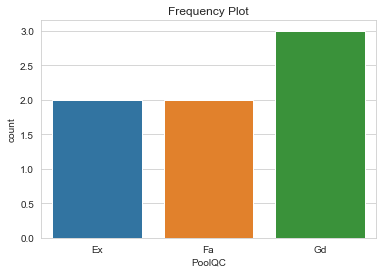

-------------------------------------------------------
Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64
Not Null Values 7 and Null Values 1453


In [10]:
# Lets first take PoolQC, it has around 99.52 number of null values
# As per the Data Dictionary: PoolQC: Pool quality
# And for NA value: No pool is there
sns.countplot(df_house_pred['PoolQC'])
plt.title('Frequency Plot')
plt.show()
print("-------------------------------------------------------")
print(df_house_pred['PoolQC'].value_counts())
print("Not Null Values {0} and Null Values {1}".format(df_house_pred['PoolQC'].value_counts().sum(), df_house_pred['PoolQC'].isna().sum() ))

**Conclusion Driven**: As we can see above there is a huge imbalance in the data, one possible reason is most of the house doesn't have Pool, that's why most of the data is Null.
Taking a decision to drop them as, imputing it will again make the data imbalanced

In [11]:
df_house_pred.drop(['PoolQC'], axis = 1, inplace = True )

In [12]:
# Checking the null values after removal
check_null_values()

Total_missing  Percentage
MiscFeature            1406       96.30
Alley                  1369       93.77
Fence                  1179       80.75
FireplaceQu             690       47.26
LotFrontage             259       17.74
GarageType               81        5.55
GarageYrBlt              81        5.55
GarageQual               81        5.55
GarageCond               81        5.55
GarageFinish             81        5.55
BsmtFinType2             38        2.60
BsmtExposure             38        2.60
BsmtCond                 37        2.53
BsmtFinType1             37        2.53
BsmtQual                 37        2.53
MasVnrArea                8        0.55
MasVnrType                8        0.55
Electrical                1        0.07

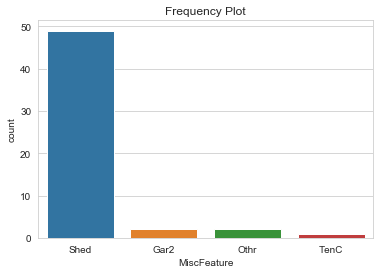

-------------------------------------------------------
Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64
Not Null Values 54 and Null Values 1406


In [13]:
# Lets first take MiscFeature, it has around 96.30 number of null values
# As per the Data Dictionary: MiscFeature: Miscellaneous feature not covered in other categories
# And for NA value: None that means there is no additional features

sns.countplot(df_house_pred['MiscFeature'])
plt.title('Frequency Plot')
plt.show()
print("-------------------------------------------------------")
print(df_house_pred['MiscFeature'].value_counts())
print("Not Null Values {0} and Null Values {1}".format(df_house_pred['MiscFeature'].value_counts().sum(), df_house_pred['MiscFeature'].isna().sum() ))

**Conclusion Driven**: As we can see above there is a hige amount of NA values, the reason is here are no additional features, and number of houses for which additional features exists is also very less. So taking a decision to drop it

In [14]:
df_house_pred.drop(['MiscFeature'], axis = 1, inplace = True )

In [15]:
# Checking the null values after removal
check_null_values()

Total_missing  Percentage
Alley                  1369       93.77
Fence                  1179       80.75
FireplaceQu             690       47.26
LotFrontage             259       17.74
GarageYrBlt              81        5.55
GarageType               81        5.55
GarageFinish             81        5.55
GarageQual               81        5.55
GarageCond               81        5.55
BsmtExposure             38        2.60
BsmtFinType2             38        2.60
BsmtQual                 37        2.53
BsmtCond                 37        2.53
BsmtFinType1             37        2.53
MasVnrType                8        0.55
MasVnrArea                8        0.55
Electrical                1        0.07

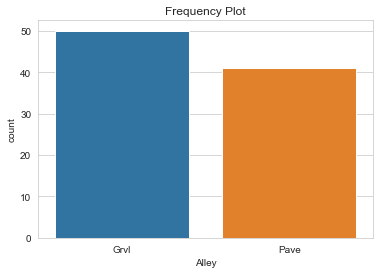

-------------------------------------------------------
Grvl    50
Pave    41
Name: Alley, dtype: int64
Not Null Values 91 and Null Values 1369


In [16]:
# Lets first take Alley, it has around 93.77 number of null values
# As per the Data Dictionary: Alley: Type of alley access to property
# And for NA value: No alley access

sns.countplot(df_house_pred['Alley'])
plt.title('Frequency Plot')
plt.show()
print("-------------------------------------------------------")
print(df_house_pred['Alley'].value_counts())
print("Not Null Values {0} and Null Values {1}".format(df_house_pred['Alley'].value_counts().sum(), df_house_pred['Alley'].isna().sum() ))

**Conclusion Driven**: Possible reason why there are so much Null Values, because for most of the houses there is no alley, and for few of them they have, so that's the reason there is a huge class imbalance is there.
Taking a decision to drop the column

In [17]:
df_house_pred.drop(['Alley'], axis = 1, inplace = True )

In [18]:
# Checking the null values after removal
check_null_values()

Total_missing  Percentage
Fence                  1179       80.75
FireplaceQu             690       47.26
LotFrontage             259       17.74
GarageYrBlt              81        5.55
GarageType               81        5.55
GarageFinish             81        5.55
GarageQual               81        5.55
GarageCond               81        5.55
BsmtExposure             38        2.60
BsmtFinType2             38        2.60
BsmtQual                 37        2.53
BsmtCond                 37        2.53
BsmtFinType1             37        2.53
MasVnrType                8        0.55
MasVnrArea                8        0.55
Electrical                1        0.07

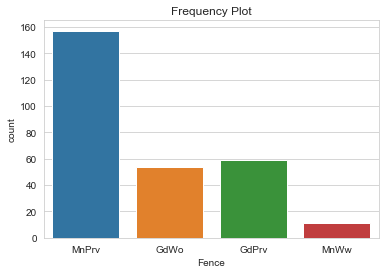

-------------------------------------------------------
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
Not Null Values 281 and Null Values 1179


In [19]:
# Lets first take Fence, it has around 80.75 number of null values
# As per the Data Dictionary: Fence: Fence quality
# And for NA value: No Fence
sns.countplot(df_house_pred['Fence'])
plt.title('Frequency Plot')
plt.show()
print("-------------------------------------------------------")
print(df_house_pred['Fence'].value_counts())
print("Not Null Values {0} and Null Values {1}".format(df_house_pred['Fence'].value_counts().sum(), df_house_pred['Fence'].isna().sum() ))

**Conclusion Driven**: As we can see around ~20% of data are having not null values and ~80% are having null values. Around 1179 doesn't have any fences, so the Null Values exists so even if we impute this will lead to class imbalance. Hence taking a decision to drop them 

In [20]:
df_house_pred.drop(['Fence'], axis = 1, inplace = True )

In [21]:
# Checking the null values after removal
check_null_values()

Total_missing  Percentage
FireplaceQu             690       47.26
LotFrontage             259       17.74
GarageType               81        5.55
GarageYrBlt              81        5.55
GarageFinish             81        5.55
GarageQual               81        5.55
GarageCond               81        5.55
BsmtExposure             38        2.60
BsmtFinType2             38        2.60
BsmtQual                 37        2.53
BsmtCond                 37        2.53
BsmtFinType1             37        2.53
MasVnrArea                8        0.55
MasVnrType                8        0.55
Electrical                1        0.07

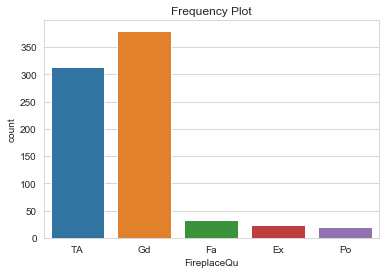

-------------------------------------------------------
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
Not Null Values 770 and Null Values 690


In [22]:
# Lets first take FireplaceQu, it has around 47.26 number of null values
# As per the Data Dictionary: FireplaceQu: Fireplace quality
# And for NA value: No Fireplace

sns.countplot(df_house_pred['FireplaceQu'])
plt.title('Frequency Plot')
plt.show()
print("-------------------------------------------------------")
print(df_house_pred['FireplaceQu'].value_counts())
print("Not Null Values {0} and Null Values {1}".format(df_house_pred['FireplaceQu'].value_counts().sum(), df_house_pred['FireplaceQu'].isna().sum() ))

**Conclusion Driven**: As we can see above the Null values are around 690, that's because most of the house doesn't have Fireplaces, their value for the field Fireplaces is Null, hence, So if we try to categorise this value as new Value, it will lead to huge class imbalance, as we can't impute it with other feature then the Fireplaces columns will have 0 for their value.

Hence we are taking a decision to drop them

In [23]:
df_house_pred.drop(['FireplaceQu'], axis = 1, inplace = True )

In [24]:
# Checking the null values after removal
check_null_values()

Total_missing  Percentage
LotFrontage             259       17.74
GarageType               81        5.55
GarageCond               81        5.55
GarageYrBlt              81        5.55
GarageFinish             81        5.55
GarageQual               81        5.55
BsmtFinType2             38        2.60
BsmtExposure             38        2.60
BsmtFinType1             37        2.53
BsmtCond                 37        2.53
BsmtQual                 37        2.53
MasVnrArea                8        0.55
MasVnrType                8        0.55
Electrical                1        0.07

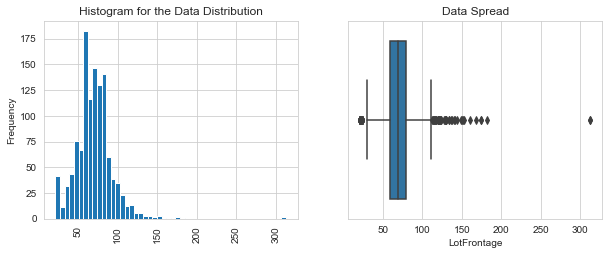

-------------------------------------------------------
Not Null Values 1201 and Null Values 259


In [25]:
# Lets first take LotFrontage, it has around 17.74 number of null values
# As per the Data Dictionary: Linear feet of street connected to property

# Check th distribution of the data
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
df_house_pred['LotFrontage'].plot.hist(bins = 50)
plt.xticks(rotation = 90)
plt.title('Histogram for the Data Distribution')


plt.subplot(2,2,2)
plt.title('Data Spread')
sns.boxplot(df_house_pred['LotFrontage'])
plt.show()

print("-------------------------------------------------------")
print("Not Null Values {0} and Null Values {1}".format(df_house_pred['LotFrontage'].value_counts().sum(), df_house_pred['LotFrontage'].isna().sum() ))

**Conclusion Driven**: As it can be seen LotFrontage there are some null values, possible reason can be there is no street connected with the property. So as the percentage is around ~10% would impute with median and no mean( because of outlier )

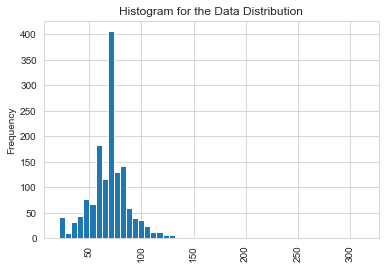

In [26]:
# Imputing the values with mean
df_house_pred['LotFrontage'].fillna(round(df_house_pred['LotFrontage'].mean(),1),inplace = True)
df_house_pred['LotFrontage'].plot.hist(bins = 50)
plt.xticks(rotation = 90)
plt.title('Histogram for the Data Distribution')
plt.show()

In [27]:
# Checking the null values after imputing
check_null_values()

Total_missing  Percentage
GarageType               81        5.55
GarageYrBlt              81        5.55
GarageFinish             81        5.55
GarageQual               81        5.55
GarageCond               81        5.55
BsmtExposure             38        2.60
BsmtFinType2             38        2.60
BsmtQual                 37        2.53
BsmtCond                 37        2.53
BsmtFinType1             37        2.53
MasVnrType                8        0.55
MasVnrArea                8        0.55
Electrical                1        0.07

**Conclusion Driven**
1. Lets first take GarageType,GarageYrBlt, GarageFinish, GarageQual,GarageCond it has around 5.55 number of null values. As per the Data Dictionary: They all having NA values there is no garrage

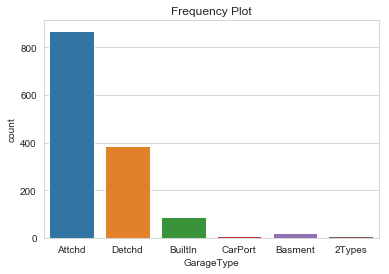

-------------------------------------------------------
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Not Null Values 1379 and Null Values 81


In [28]:
# As this a categorical value
sns.countplot(df_house_pred['GarageType'])
plt.title('Frequency Plot')
plt.show()
print("-------------------------------------------------------")
print(df_house_pred['GarageType'].value_counts())
print("Not Null Values {0} and Null Values {1}".format(df_house_pred['GarageType'].value_counts().sum(), df_house_pred['GarageType'].isna().sum() ))

In [29]:
# Imputing the Null Values with the attached as that's the mode
df_house_pred['GarageType'].fillna('Attchd', inplace = True)

In [30]:
# Replacing the Garage Build year with Mode
df_house_pred['GarageYrBlt'].fillna(int(df_house_pred['GarageYrBlt'].mode()[0]), inplace = True)

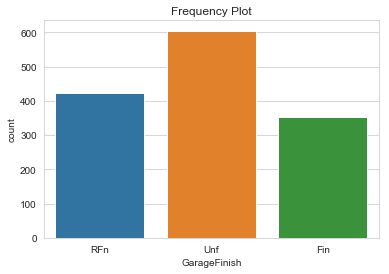

-------------------------------------------------------
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
Not Null Values 1379 and Null Values 81


In [31]:
# Checking the distribution for GarageFinish
sns.countplot(df_house_pred['GarageFinish'])
plt.title('Frequency Plot')
plt.show()
print("-------------------------------------------------------")
print(df_house_pred['GarageFinish'].value_counts())
print("Not Null Values {0} and Null Values {1}".format(df_house_pred['GarageFinish'].value_counts().sum(), df_house_pred['GarageFinish'].isna().sum() ))

In [32]:
# Imputing the Null Values with the Unf as that's the mode
df_house_pred['GarageFinish'].fillna('Unf', inplace = True)

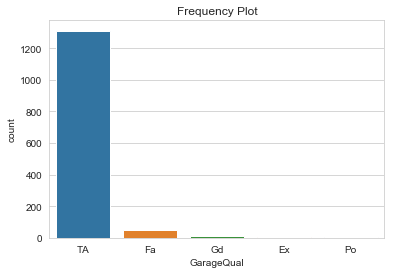

-------------------------------------------------------
TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64
Not Null Values 1379 and Null Values 81


In [33]:
# As this a categorical value
sns.countplot(df_house_pred['GarageQual'])
plt.title('Frequency Plot')
plt.show()
print("-------------------------------------------------------")
print(df_house_pred['GarageQual'].value_counts())
print("Not Null Values {0} and Null Values {1}".format(df_house_pred['GarageQual'].value_counts().sum(), df_house_pred['GarageQual'].isna().sum() ))

In [34]:
# As we can see around 1311 record are belonging to only one Type, so even if we impute there will be a huge class imbalance
# So here a decision was taken to drop this feature
df_house_pred.drop(['GarageQual'], axis=1, inplace=True)

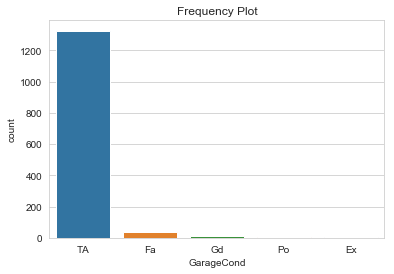

-------------------------------------------------------
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
Not Null Values 1379 and Null Values 81


In [35]:
# As this a categorical value
sns.countplot(df_house_pred['GarageCond'])
plt.title('Frequency Plot')
plt.show()
print("-------------------------------------------------------")
print(df_house_pred['GarageCond'].value_counts())
print("Not Null Values {0} and Null Values {1}".format(df_house_pred['GarageCond'].value_counts().sum(), df_house_pred['GarageCond'].isna().sum() ))

In [36]:
# As we can see around 1326 record are belonging to only one Type, so even if we impute there will be a huge class imbalance
# So here a decision was taken to drop this feature
df_house_pred.drop(['GarageCond'], axis=1, inplace=True)

In [37]:
# Checking the null values after imputing
check_null_values()

Total_missing  Percentage
BsmtFinType2             38        2.60
BsmtExposure             38        2.60
BsmtCond                 37        2.53
BsmtFinType1             37        2.53
BsmtQual                 37        2.53
MasVnrType                8        0.55
MasVnrArea                8        0.55
Electrical                1        0.07

2. For the feature: BsmtExposure, BsmtFinType2, BsmtQual, BsmtCond, BsmtFinType1, all of them have same missing values because for all of them there is no Basement, hence for that features there is no values

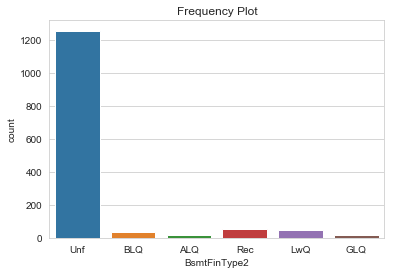

-------------------------------------------------------
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Not Null Values 1422 and Null Values 38


In [38]:
# As this a categorical value
sns.countplot(df_house_pred['BsmtFinType2'])
plt.title('Frequency Plot')
plt.show()
print("-------------------------------------------------------")
print(df_house_pred['BsmtFinType2'].value_counts())
print("Not Null Values {0} and Null Values {1}".format(df_house_pred['BsmtFinType2'].value_counts().sum(), df_house_pred['BsmtFinType2'].isna().sum() ))

In [39]:
# As we can see around 1256 record are belonging to only one Type, so even if we impute there will be a huge class imbalance
# So here a decision was taken to drop this feature
df_house_pred.drop(['BsmtFinType2'], axis=1, inplace=True)

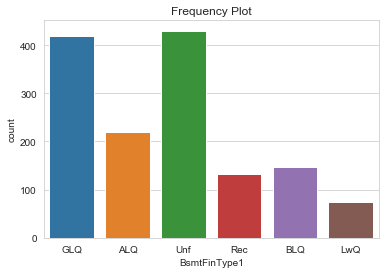

-------------------------------------------------------
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Not Null Values 1423 and Null Values 37


In [40]:
# As this a categorical value
sns.countplot(df_house_pred['BsmtFinType1'])
plt.title('Frequency Plot')
plt.show()
print("-------------------------------------------------------")
print(df_house_pred['BsmtFinType1'].value_counts())
print("Not Null Values {0} and Null Values {1}".format(df_house_pred['BsmtFinType1'].value_counts().sum(), df_house_pred['BsmtFinType1'].isna().sum() ))

In [41]:
# Imputing the Null Values with the Unf as that's the mode
df_house_pred['BsmtFinType1'].fillna('Unf', inplace = True)

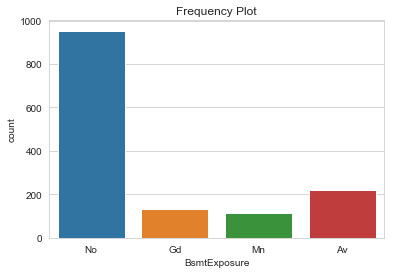

-------------------------------------------------------
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Not Null Values 1422 and Null Values 38


In [42]:
# As this a categorical value
sns.countplot(df_house_pred['BsmtExposure'])
plt.title('Frequency Plot')
plt.show()
print("-------------------------------------------------------")
print(df_house_pred['BsmtExposure'].value_counts())
print("Not Null Values {0} and Null Values {1}".format(df_house_pred['BsmtExposure'].value_counts().sum(), df_house_pred['BsmtExposure'].isna().sum() ))

In [43]:
# Imputing the Null Values with the No as that's the mode
df_house_pred['BsmtExposure'].fillna('No', inplace = True)

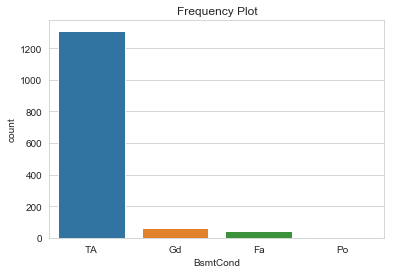

-------------------------------------------------------
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
Not Null Values 1423 and Null Values 37


In [44]:
# As this a categorical value
sns.countplot(df_house_pred['BsmtCond'])
plt.title('Frequency Plot')
plt.show()
print("-------------------------------------------------------")
print(df_house_pred['BsmtCond'].value_counts())
print("Not Null Values {0} and Null Values {1}".format(df_house_pred['BsmtCond'].value_counts().sum(), df_house_pred['BsmtCond'].isna().sum() ))

In [45]:
# As we can see around 1311 record are belonging to only one Type, so even if we impute there will be a huge class imbalance
# So here a decision was taken to drop this feature
df_house_pred.drop(['BsmtCond'], axis=1, inplace=True)

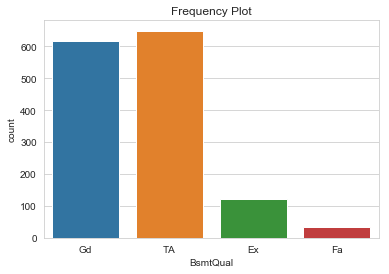

-------------------------------------------------------
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
Not Null Values 1423 and Null Values 37


In [46]:
# As this a categorical value
sns.countplot(df_house_pred['BsmtQual'])
plt.title('Frequency Plot')
plt.show()
print("-------------------------------------------------------")
print(df_house_pred['BsmtQual'].value_counts())
print("Not Null Values {0} and Null Values {1}".format(df_house_pred['BsmtQual'].value_counts().sum(), df_house_pred['BsmtQual'].isna().sum() ))

In [47]:
# Imputing the Null Values with the No as that's the mode
df_house_pred['BsmtQual'].fillna('TA', inplace = True)

In [48]:
# Checking the null values after imputing
check_null_values()

Total_missing  Percentage
MasVnrType              8        0.55
MasVnrArea              8        0.55
Electrical              1        0.07

For Electrical only one record is present. so we would take the decision to delete the row

In [49]:
# Deleting the entry for the Null Values
df_house_pred.drop(df_house_pred[df_house_pred['Electrical'].isna()].index.values[0], inplace = True)

In [50]:
# Checking the null values after imputing
check_null_values()

Total_missing  Percentage
MasVnrType              8        0.55
MasVnrArea              8        0.55

In [51]:
# For MasVnrType and MasVnrArea 
# For both the feature there are NaN values, and their count is exactly identical
df_house_pred[df_house_pred['MasVnrArea'].isna()][['MasVnrType', 'MasVnrArea']]

MasVnrType  MasVnrArea
234         NaN         NaN
529         NaN         NaN
650         NaN         NaN
936         NaN         NaN
973         NaN         NaN
977         NaN         NaN
1243        NaN         NaN
1278        NaN         NaN

In [52]:
# So taking a decision to consider them like None Value
# As MasVnrType is categorical, imputing the values with None
# And as MasVnrArea is Numerical, imputing the value with 0
df_house_pred['MasVnrType'].fillna('None',inplace = True)
df_house_pred['MasVnrArea'].fillna(0,inplace = True)

In [53]:
# Checking the null values after imputing
check_null_values()
# As we can see below there is no Null Values

Empty DataFrame
Columns: [Total_missing, Percentage]
Index: []

In [54]:
# Printing the shape of the data frame, after removal of Null Values
print("Rows {0} Columns {1}".format(df_house_pred.shape[0], df_house_pred.shape[1]))

Rows 1459 Columns 72


### Lets start with EDA

In [55]:
# Getting the categorical columns
categorical_col = df_house_pred.select_dtypes('object').columns.tolist()
print(categorical_col)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']


<Figure size 432x288 with 0 Axes>

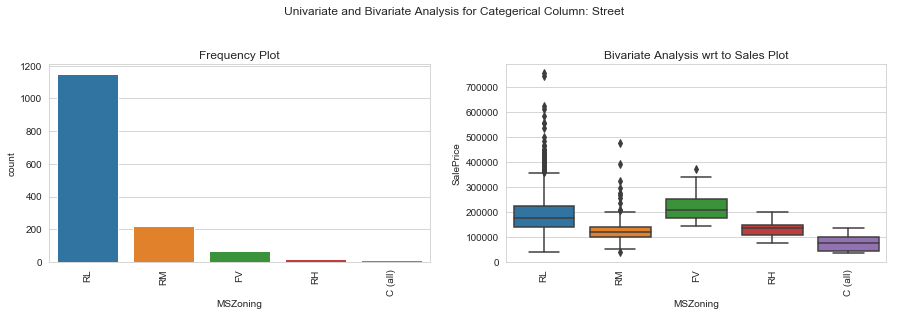

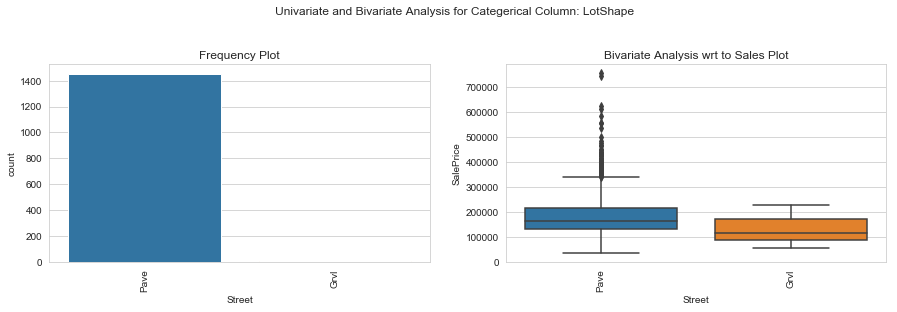

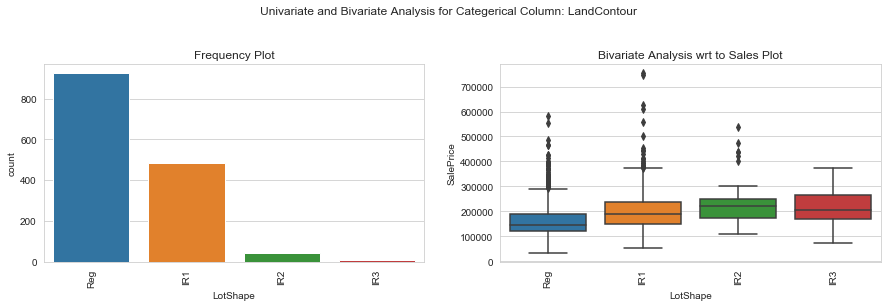

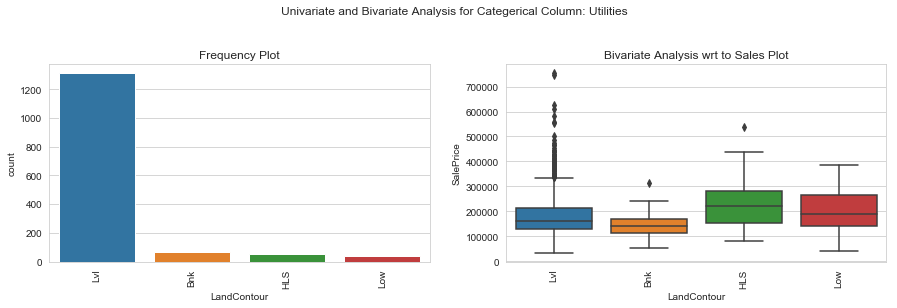

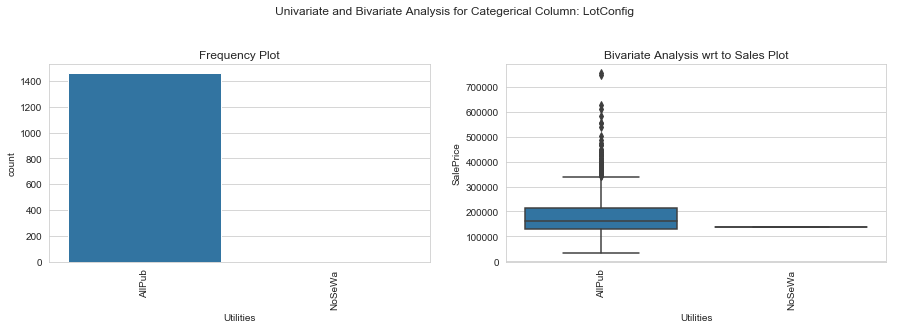

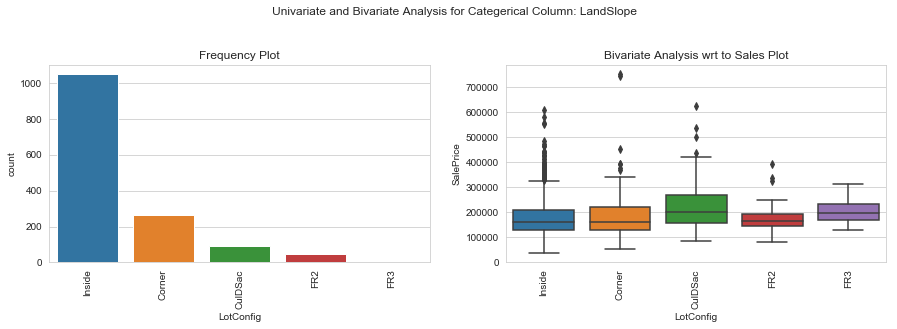

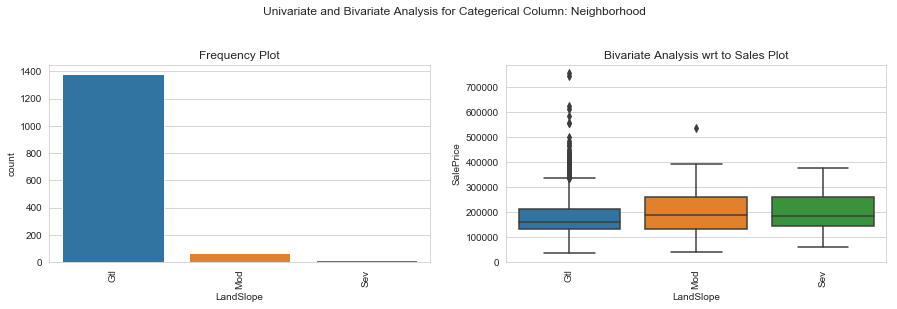

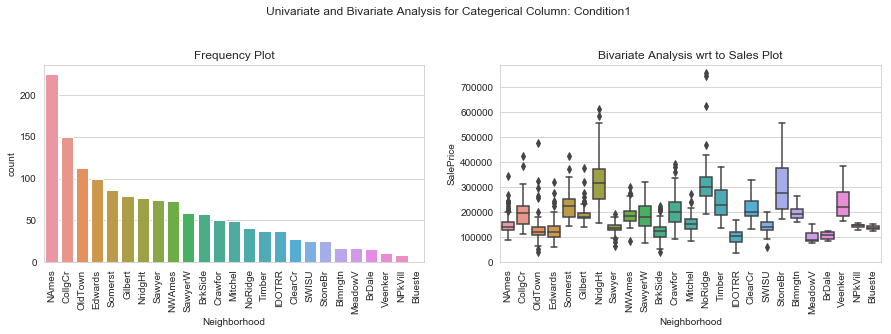

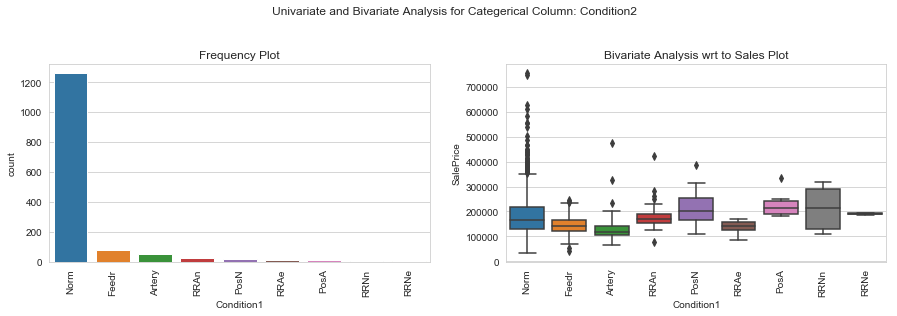

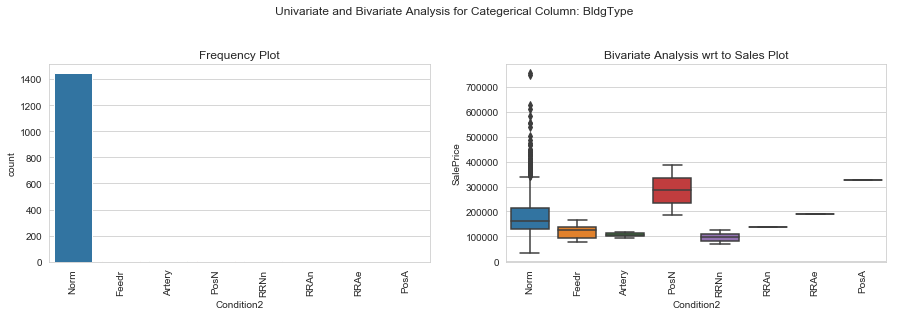

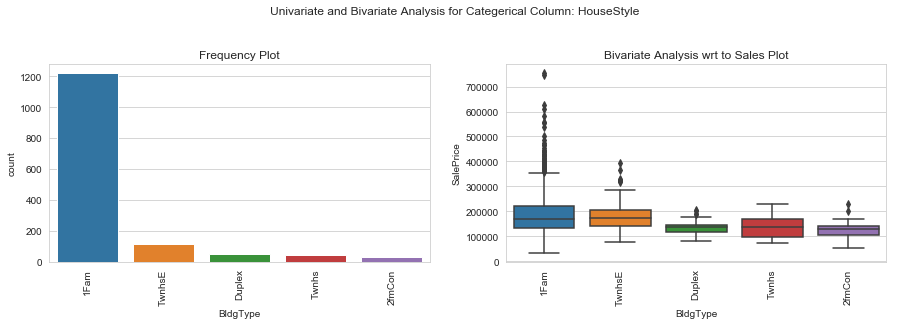

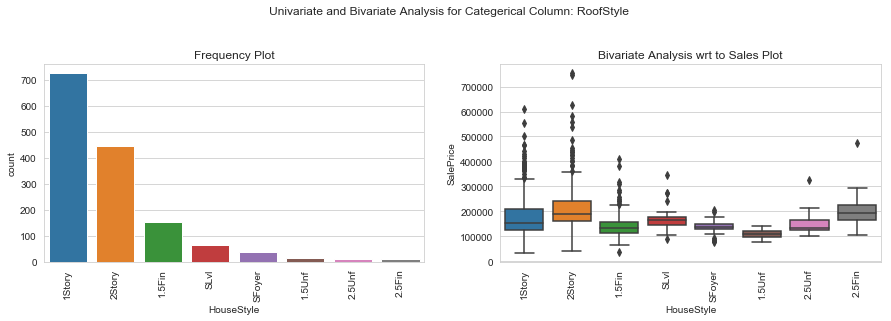

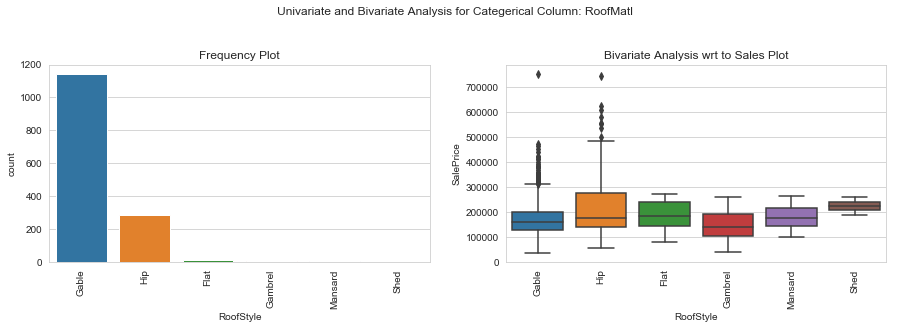

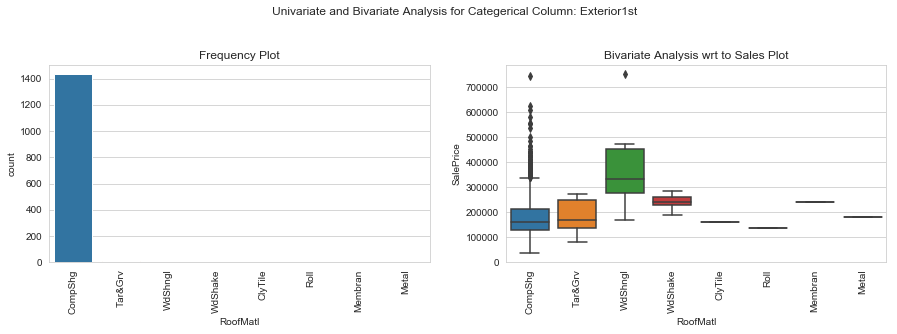

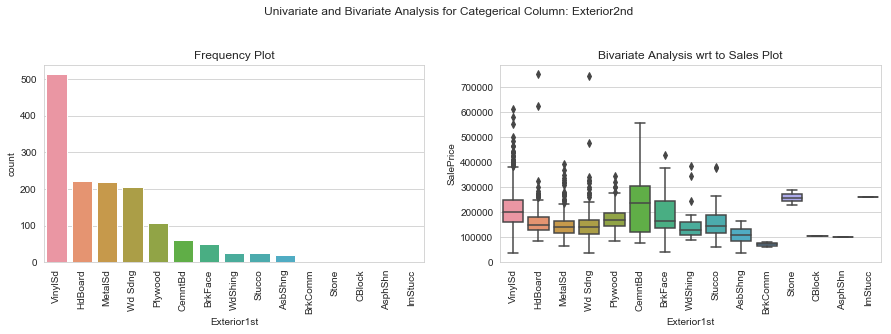

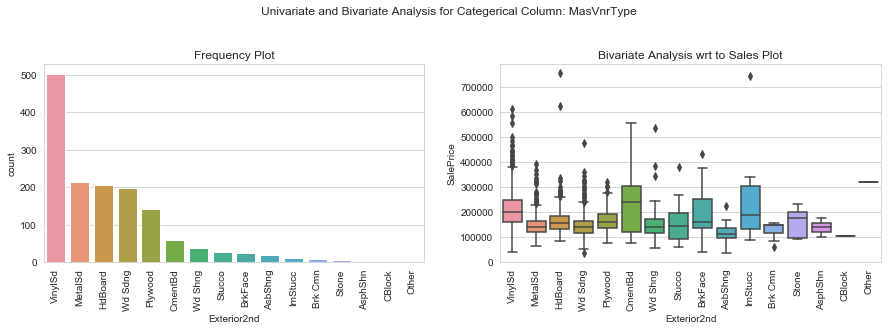

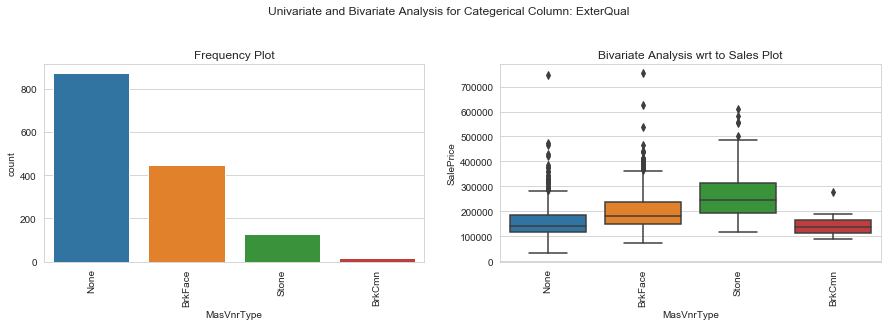

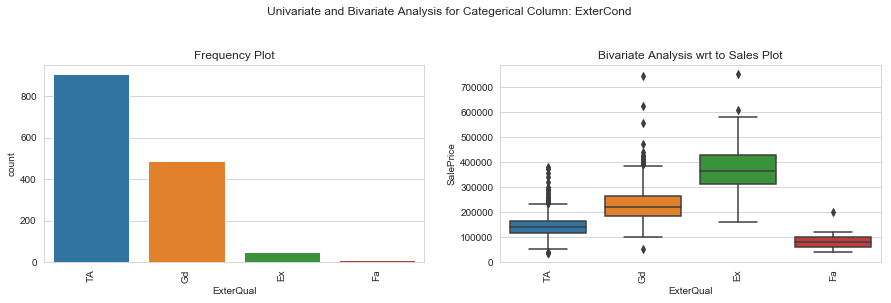

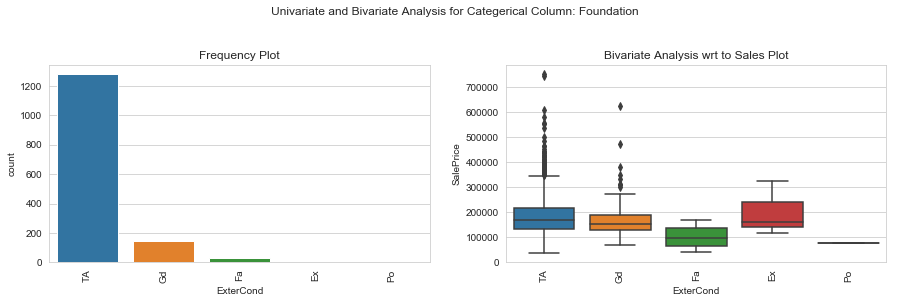

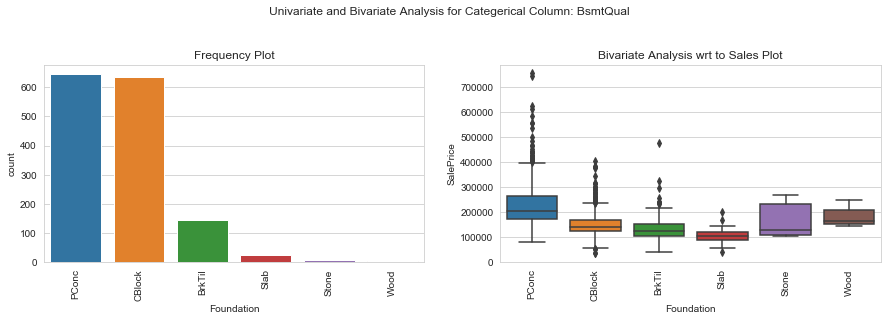

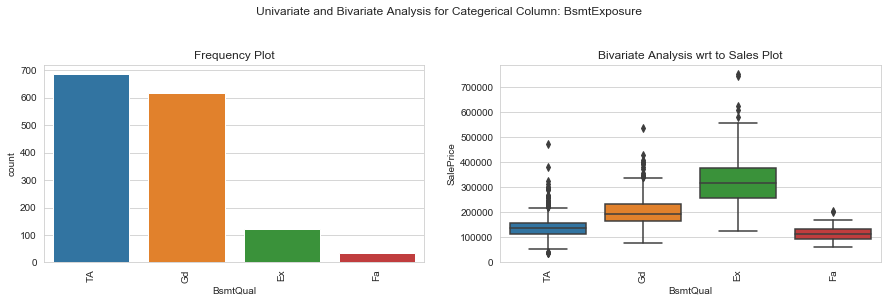

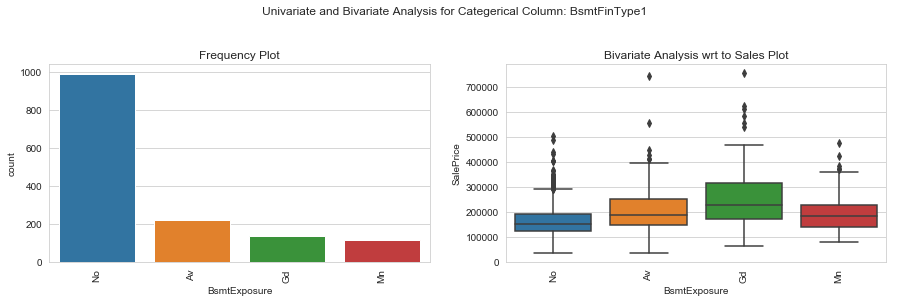

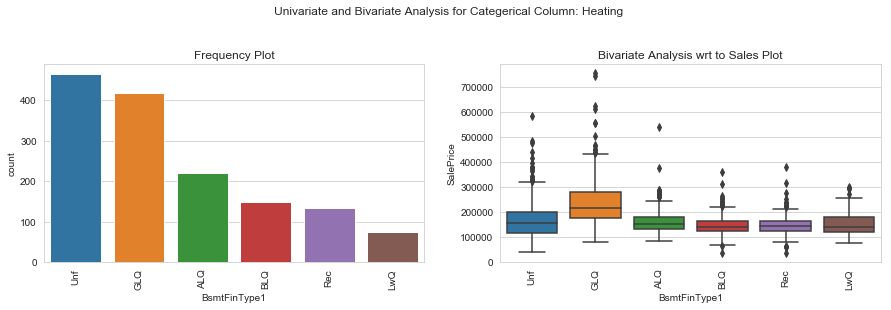

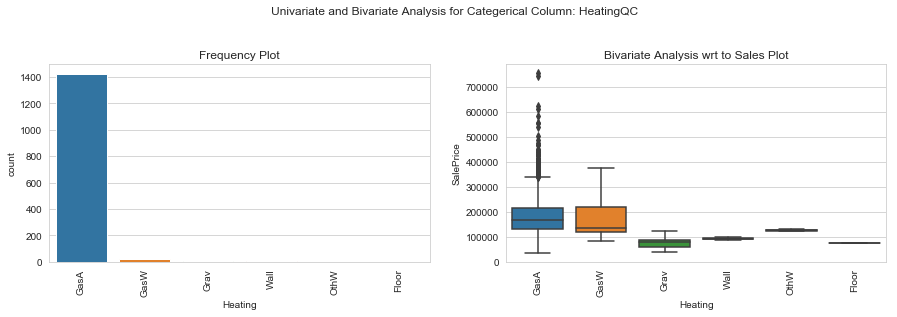

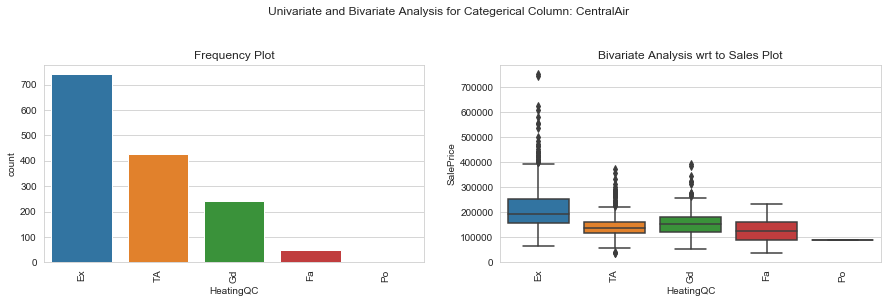

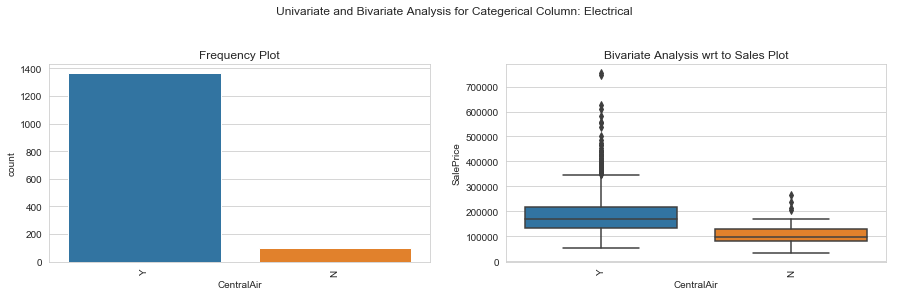

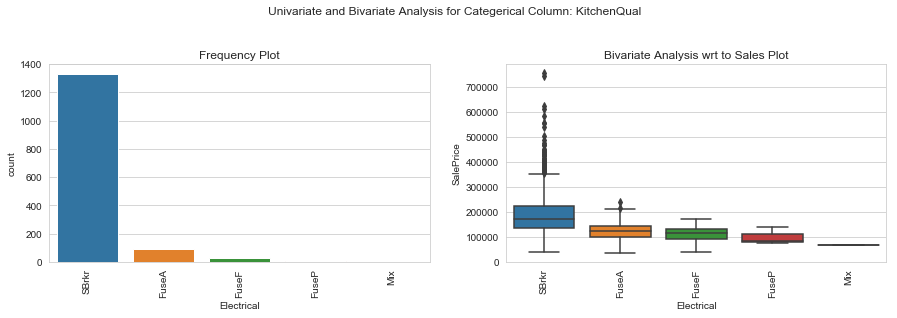

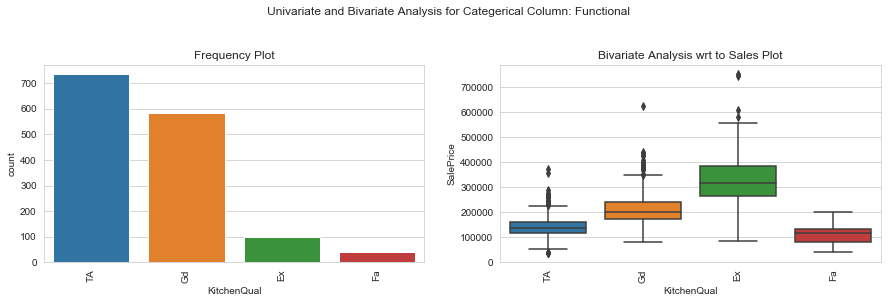

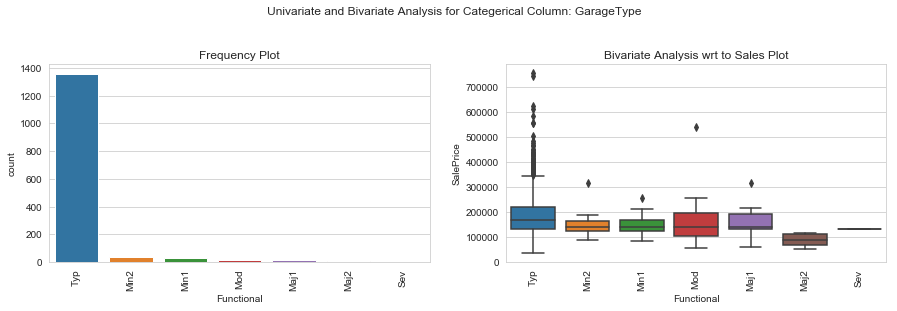

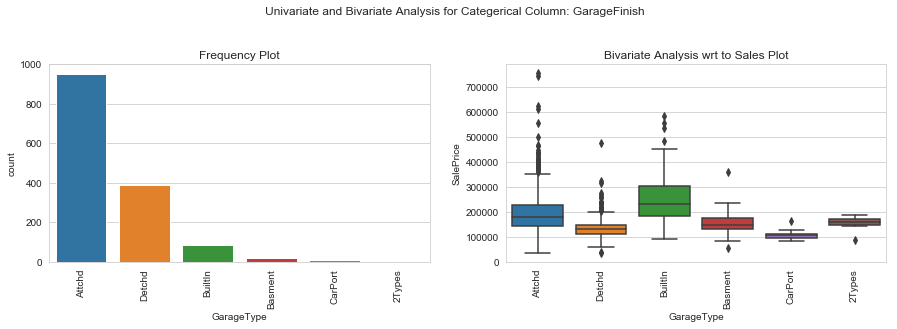

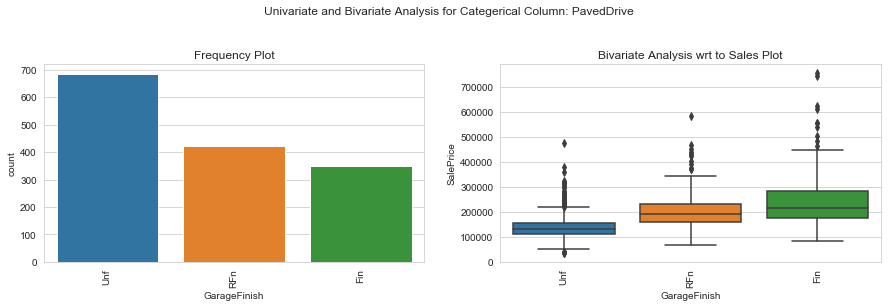

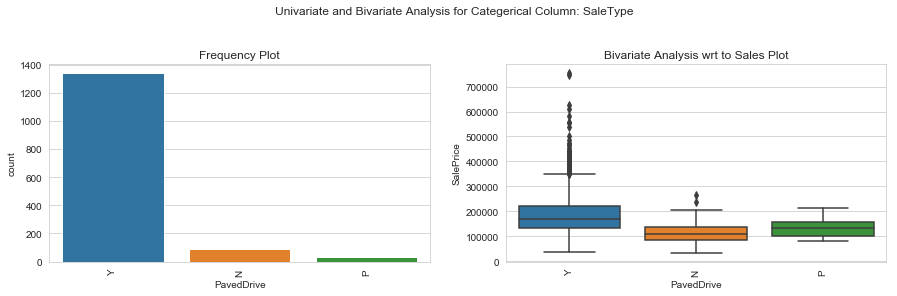

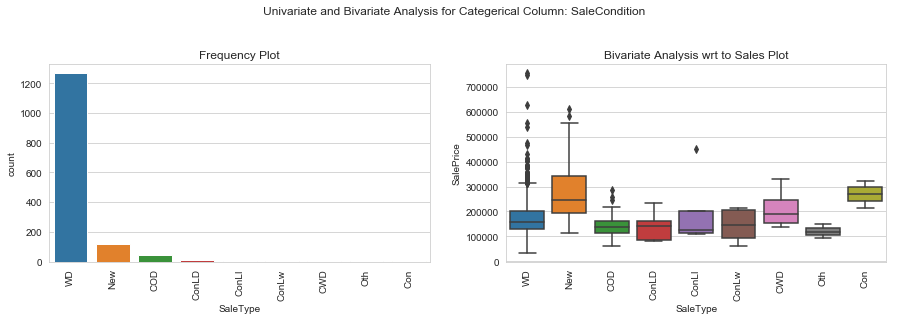

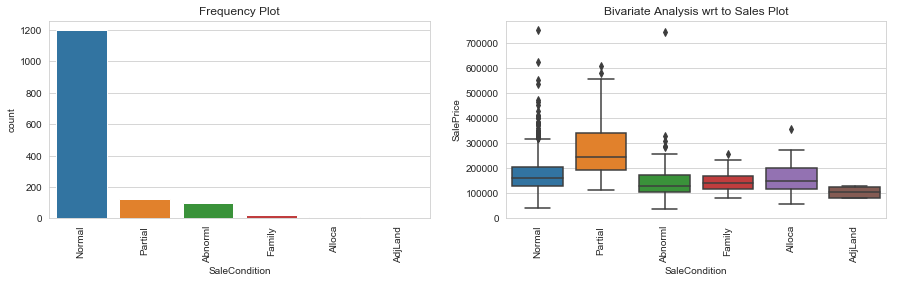

In [56]:
# Plot for Categorical Features
no_of_cols = len(categorical_col)
value = 0
for i in range(1,no_of_cols*2, 2):
    plt.suptitle('Univariate and Bivariate Analysis for Categerical Column: ' + categorical_col[value])
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(2, 2, 1)
    sns.countplot(df_house_pred[categorical_col[value]], ax=ax, order= df_house_pred[categorical_col[value]].value_counts().index)
    plt.xticks(rotation = '90')
    plt.title('Frequency Plot')

    ax = fig.add_subplot(2, 2, 2)
    sns.boxplot(x = df_house_pred[categorical_col[value]], y = df_house_pred['SalePrice'] , ax=ax, order= df_house_pred[categorical_col[value]].value_counts().index)
    plt.xticks(rotation = '90')
    plt.title('Bivariate Analysis wrt to Sales Plot')
    value += 1
plt.show()

**Conclusion Driven**:
From the Categorical Variables:
1. There are some features for which there is a uniform Distribution like GarageFinish, HeatingQC, Exterior1st, Exterior2nd and so on. But there are some problematic Features.
2. For all these Features 'MSZoning', 'LandContour', 'LotConfig', 'LandSlope', 'Condition1', 'BldgType', 'RoofStyle', 'ExterCond', 'CentralAir', 'Electrical', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition' : Data Imbalance, One or two Features is Dominating
3. There are some Features also found Street, Utilities, RoofMatl, Heating, Condition2 from the graph it loooked like there is only Features for more than 95% record is there, lets Analyze these more And their Box plot( Data Spread distribution ) for most of the categories of these features is also kindoff Single line as the number of records is pretty less.

In [57]:
print("============================== Street ==============================")
print(df_house_pred['Street'].value_counts())
print("============================== Utilities ==============================")
print(df_house_pred['Utilities'].value_counts())
print("============================== RoofMatl ==============================")
print(df_house_pred['RoofMatl'].value_counts())
print("============================== Heating ==============================")
print(df_house_pred['Heating'].value_counts())
print("============================== Condition2 ==============================")
print(df_house_pred['Condition2'].value_counts())

============================== Street ==============================
Pave    1453
Grvl       6
Name: Street, dtype: int64
============================== Utilities ==============================
AllPub    1458
NoSeWa       1
Name: Utilities, dtype: int64
============================== RoofMatl ==============================
CompShg    1433
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Roll          1
Membran       1
Metal         1
Name: RoofMatl, dtype: int64
============================== Heating ==============================
GasA     1427
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
============================== Condition2 ==============================
Norm      1444
Feedr        6
Artery       2
PosN         2
RRNn         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64


In [58]:
# As we can see from above only one Category is dominating the Features, that one Feature is contributing more than 95% of whole record
# So Lets Drop these Features
df_house_pred.drop(['Street', 'Utilities', 'RoofMatl', 'Heating', 'Condition2' ], axis=1, inplace = True)

In [59]:
# Getting the Numeric columns
numeric_col = df_house_pred.select_dtypes([np.number]).columns.tolist()
# Removing some columns
numeric_col.remove('Id') # As this is the ID
numeric_col.remove('SalePrice') # And this is the Target Variable
print(numeric_col)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


<Figure size 432x288 with 0 Axes>

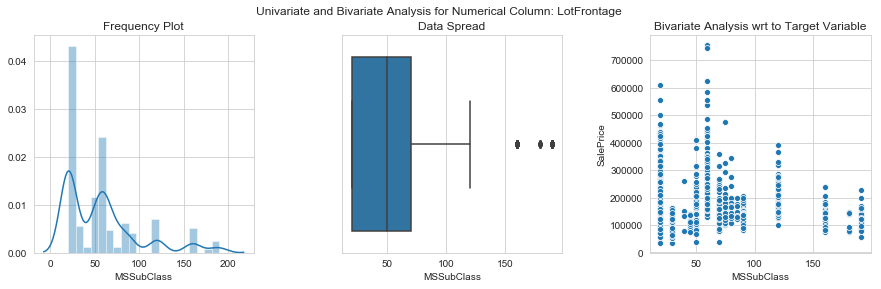

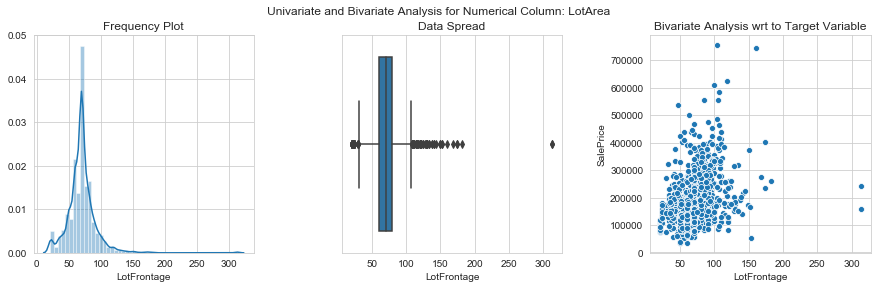

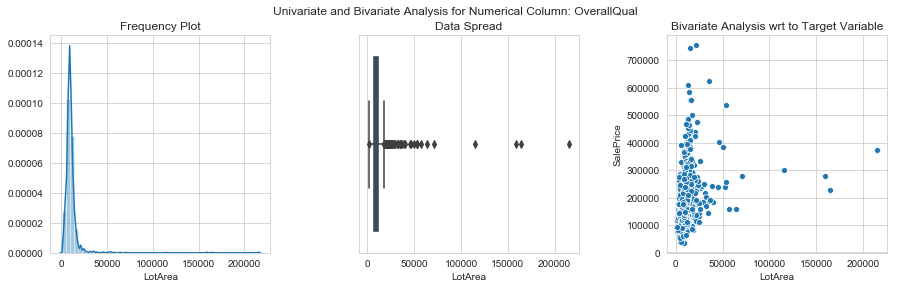

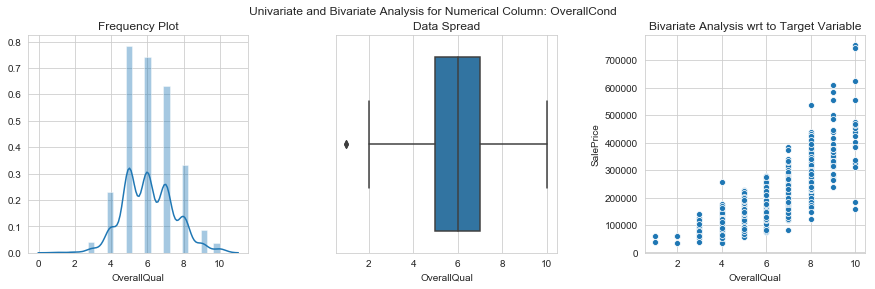

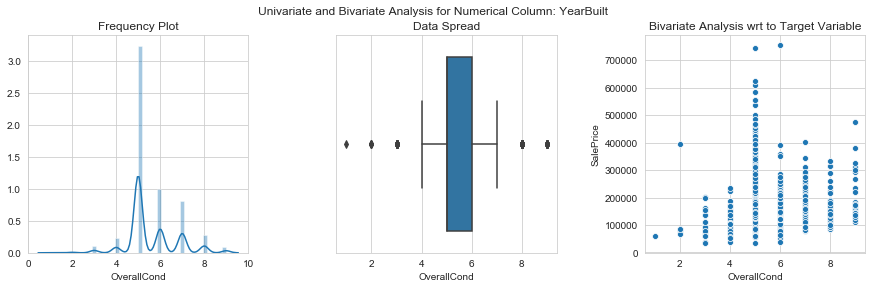

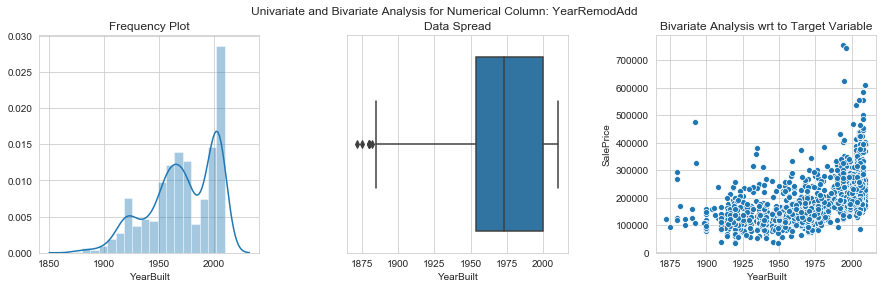

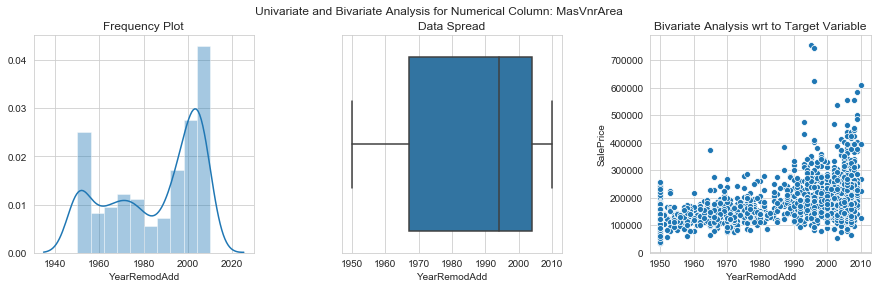

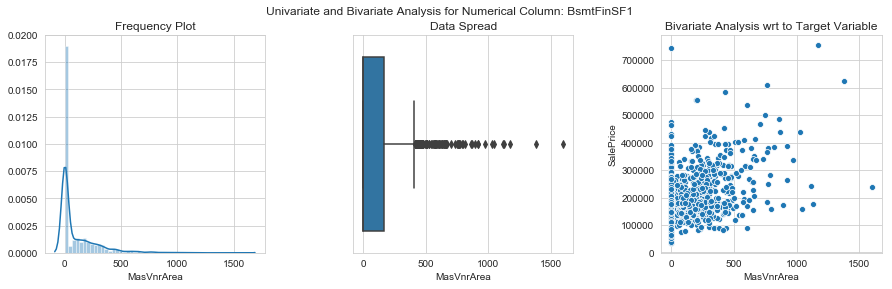

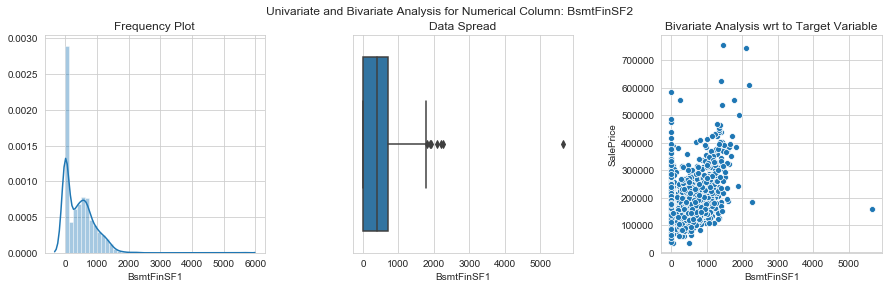

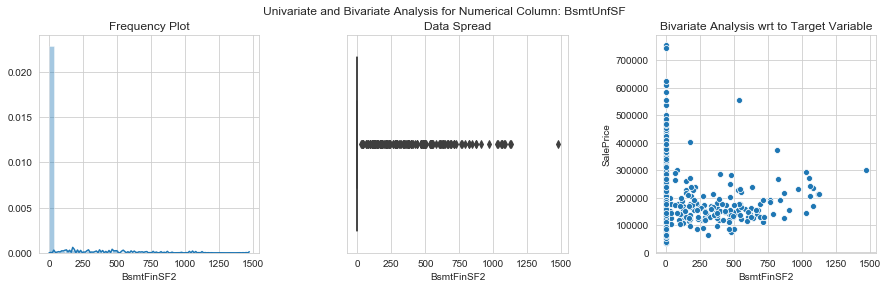

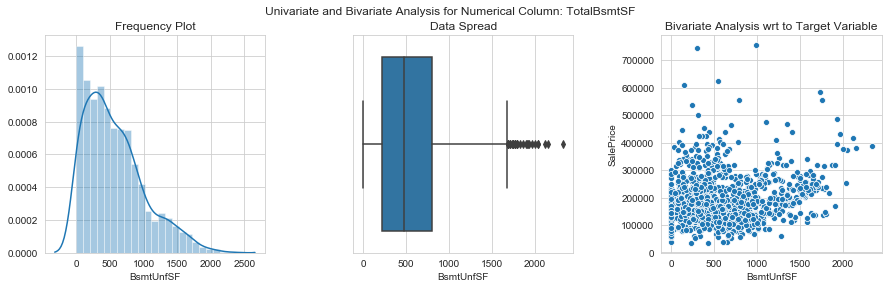

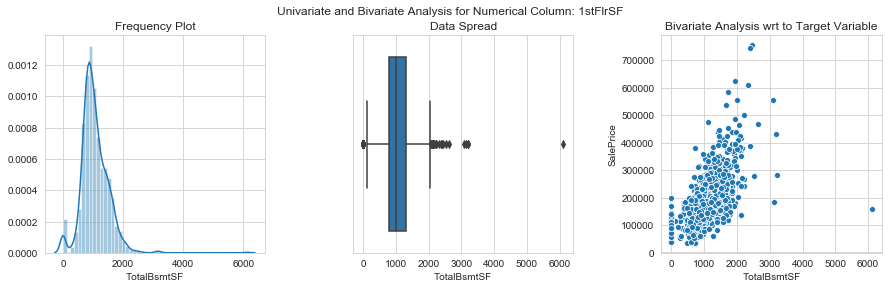

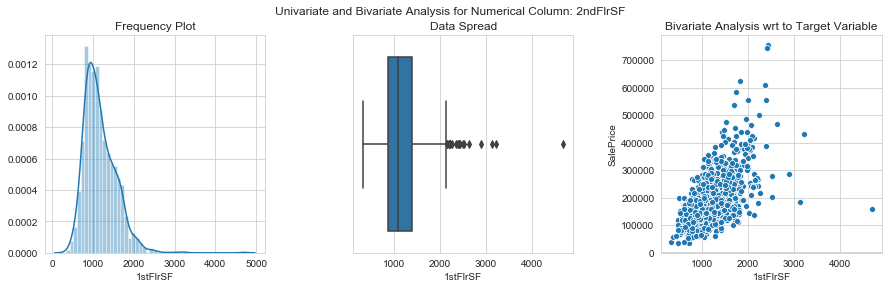

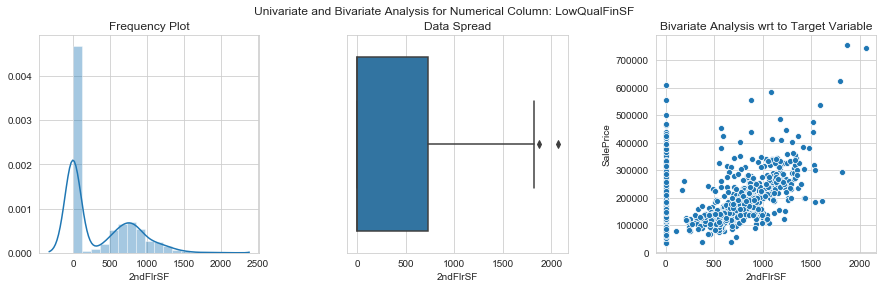

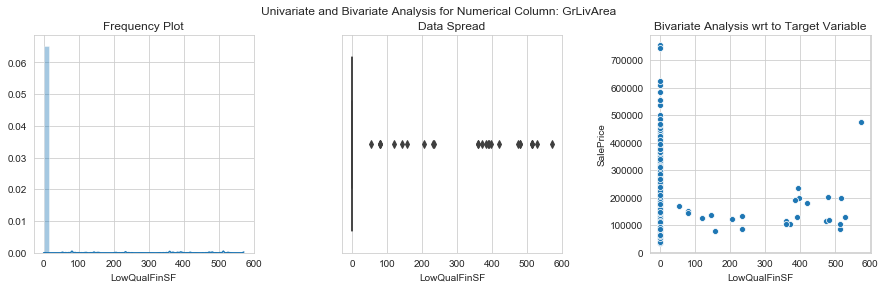

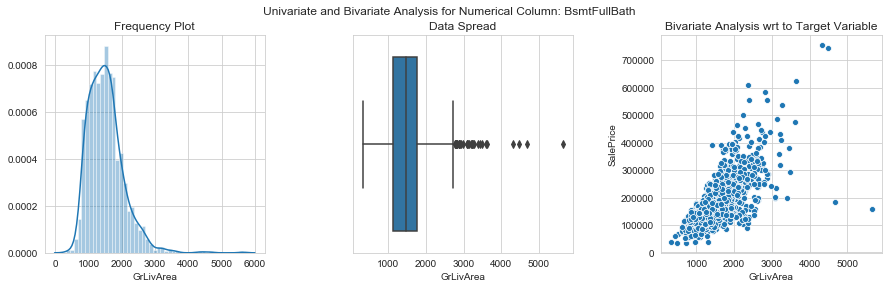

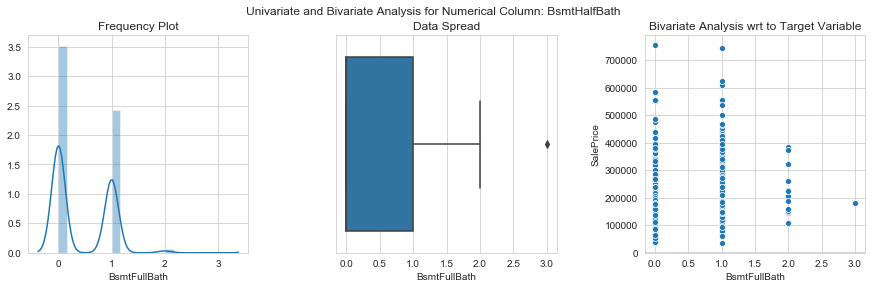

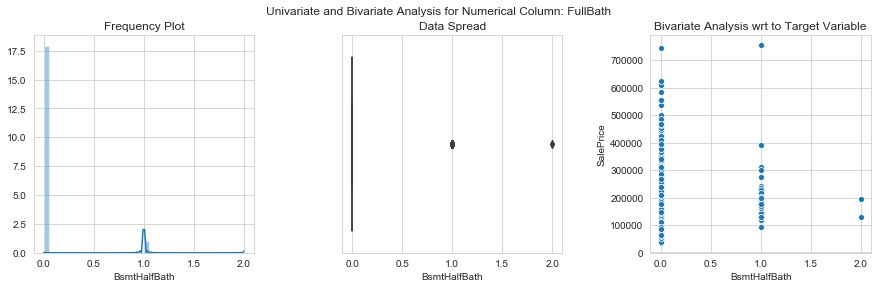

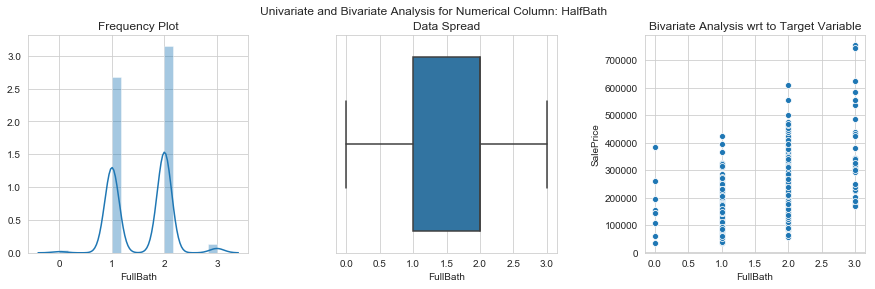

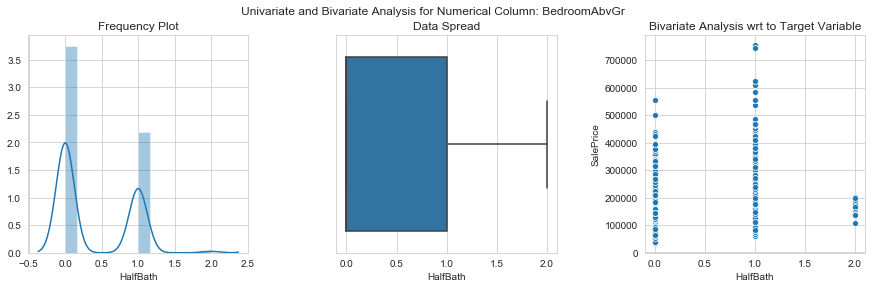

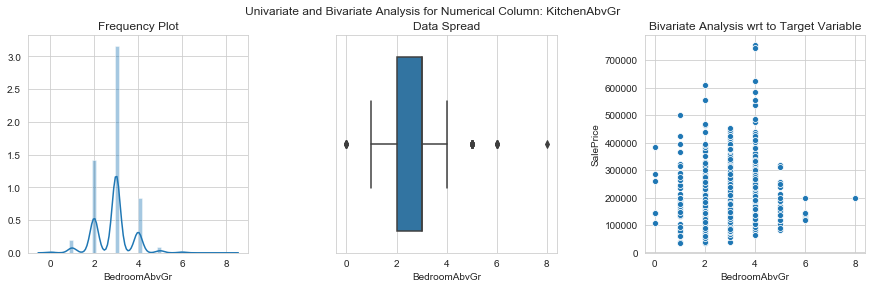

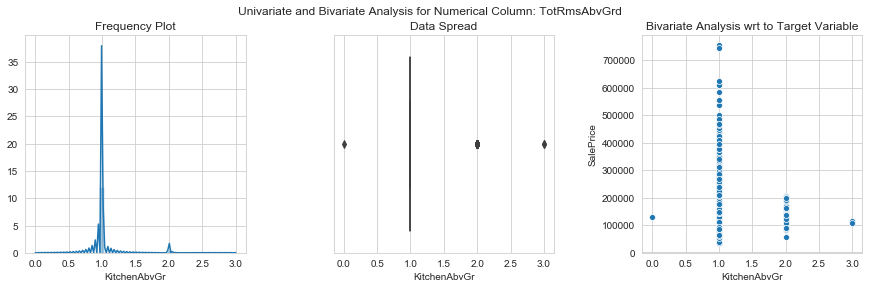

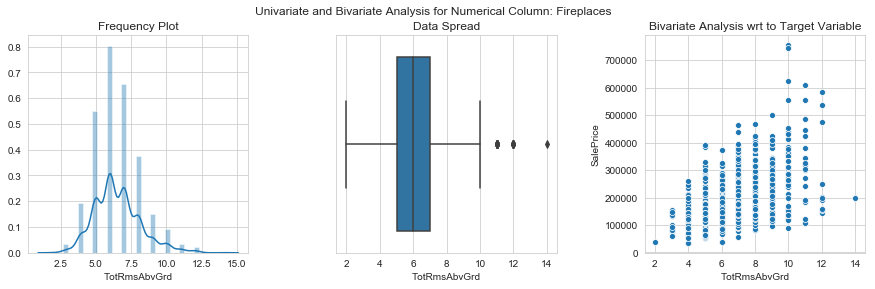

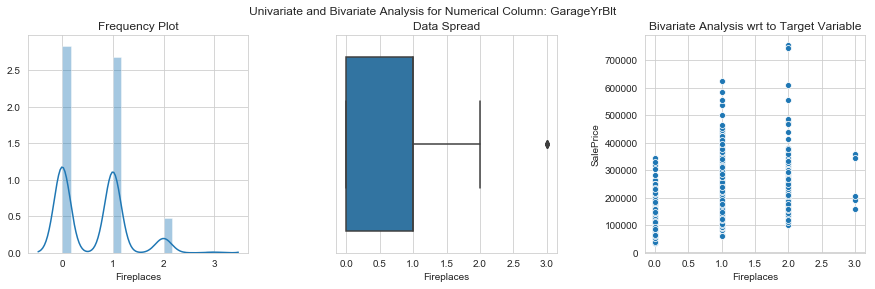

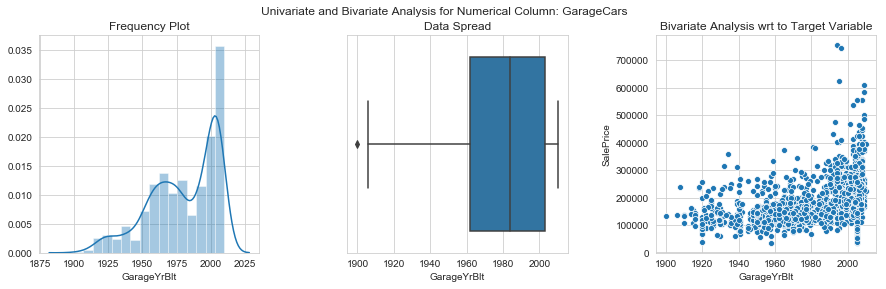

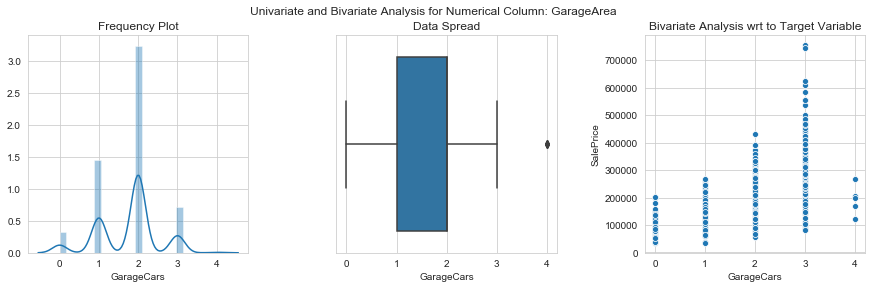

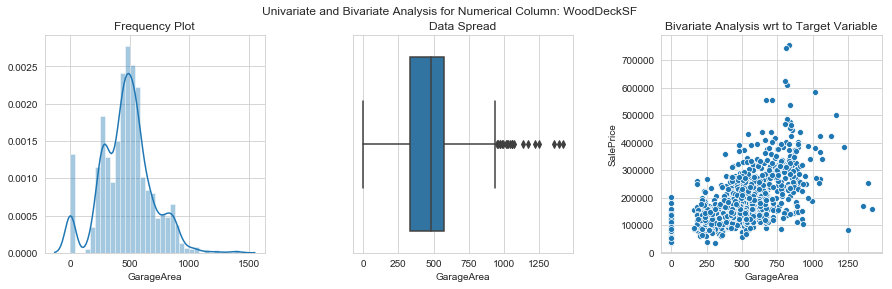

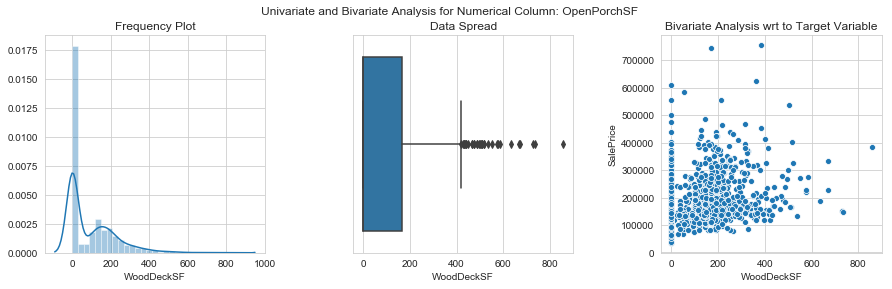

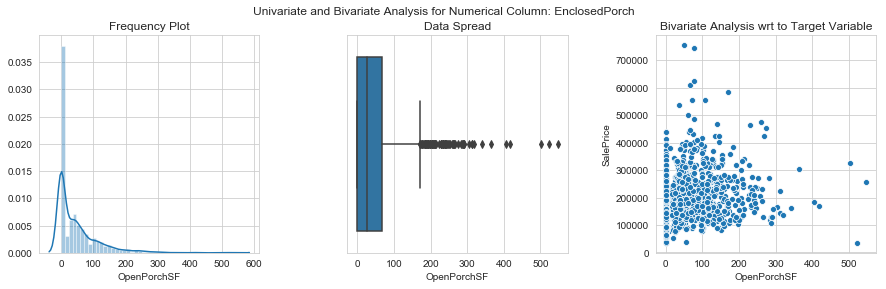

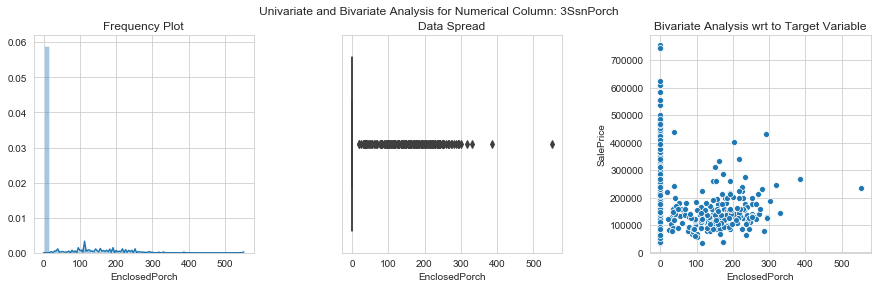

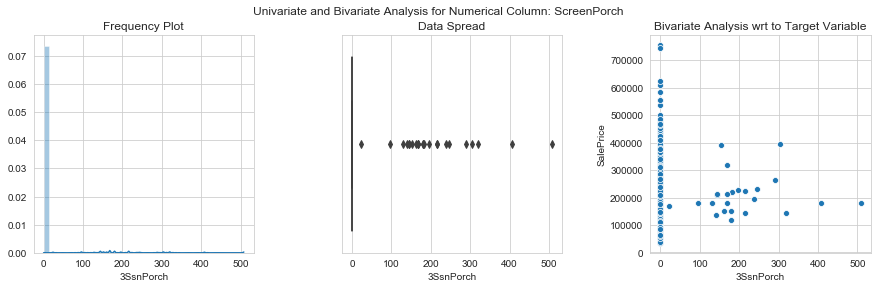

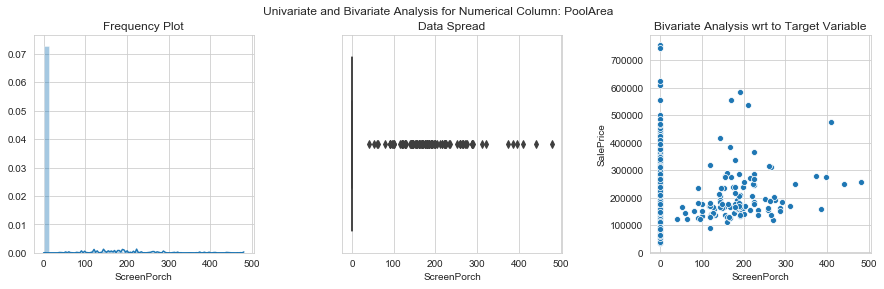

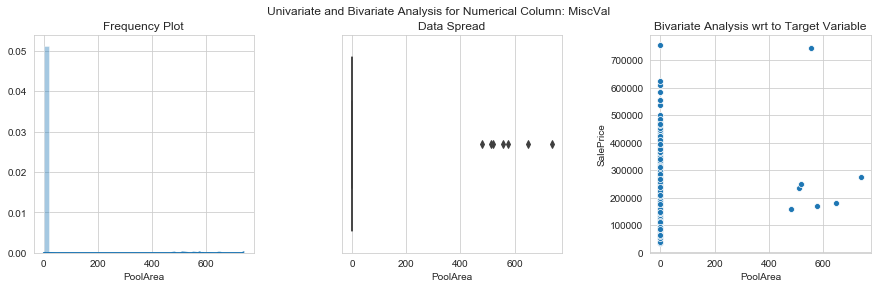

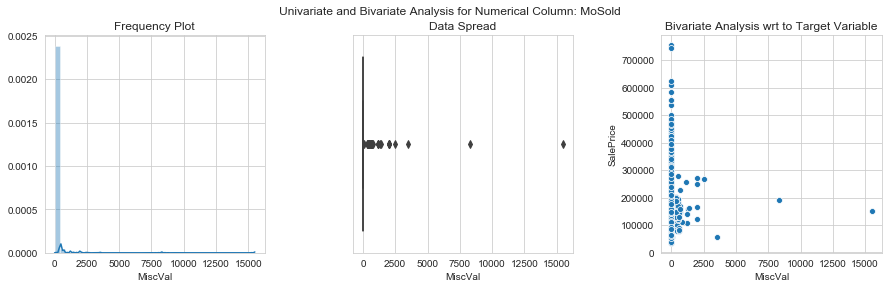

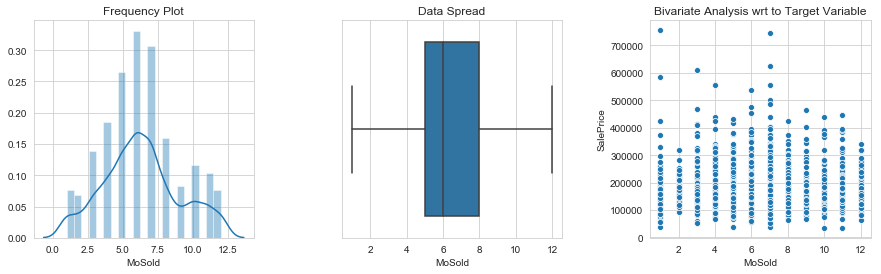

In [60]:
# Plot for Numerical Features
# An Univariate Analysis of the Features
# And also a Bivariate Analysis wrt to some Target Variable

no_of_cols = len(numeric_col)
value = 0
for i in range(1,no_of_cols):
    plt.suptitle('Univariate and Bivariate Analysis for Numerical Column: ' + numeric_col[value])
    fig = plt.figure(figsize=(15,4))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    ax = fig.add_subplot(1, 3, 1)
    sns.distplot(df_house_pred[numeric_col[value]], ax=ax)
    plt.title('Frequency Plot')

    ax = fig.add_subplot(1, 3, 2)
    sns.boxplot(x = df_house_pred[numeric_col[value]], ax=ax )
    plt.title('Data Spread')
    
    ax = fig.add_subplot(1, 3, 3)
    sns.scatterplot(df_house_pred[numeric_col[value]], df_house_pred['SalePrice'], ax = ax)
    plt.title('Bivariate Analysis wrt to Target Variable')
    value += 1
plt.show()

**Conclusion Driven**:
There are mainly three Kinds of Features Found
1. Some of the Numerical Features which has Distinct Values like a categorical Variable : MSSubClass, OverallQual, OverallCond, BsmtFullBath, BasmtHalfBath, FullBath, HalfBath, BathroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, MoSold
2. Some Features where the Data has a wide spread, LowQualFinSF, 3SsnPorch, ScreenPorch, PoolArea, Data is not condensed, rather it's spreaded
3. Rest all Features have a pretty Linear Relationship wrt to the Target Variable

In [61]:
#  After checking the Data Dictionary, these are the Features, MSSubClass, OverallQual, OverallCond which are categorical variable
# Hence changing the data type
df_house_pred[['MSSubClass', 'OverallQual', 'OverallCond' ]] = df_house_pred[['MSSubClass', 'OverallQual', 'OverallCond' ]].astype('object') 
df_house_pred[['MSSubClass', 'OverallQual', 'OverallCond' ]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 3 columns):
MSSubClass     1459 non-null object
OverallQual    1459 non-null object
OverallCond    1459 non-null object
dtypes: object(3)
memory usage: 85.6+ KB


In [62]:
# Derived Feature
# So for all the Features which has Year in it, YearBuilt  YearRemodAdd  GarageYrBlt YrSold
# We would derive the Age by subtracting the max Year - current year

df_house_pred['YearBuilt_age'] = df_house_pred['YearBuilt'].max() - df_house_pred['YearBuilt']
df_house_pred['GarageYrBlt_age'] = df_house_pred['GarageYrBlt'].max() - df_house_pred['GarageYrBlt']
df_house_pred['YearRemodAdd_age'] = df_house_pred['YearRemodAdd'].max() - df_house_pred['YearRemodAdd']
df_house_pred['YrSold_age'] = df_house_pred['YrSold'].max() - df_house_pred['YrSold']
df_house_pred[['YearBuilt_age', 'GarageYrBlt_age', 'YearRemodAdd_age', 'YrSold_age' ]].head()

YearBuilt_age  GarageYrBlt_age  YearRemodAdd_age  YrSold_age
0              7              7.0                 7           2
1             34             34.0                34           3
2              9              9.0                 8           2
3             95             12.0                40           4
4             10             10.0                10           2

In [63]:
# Dropping the Original Features
df_house_pred.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'], axis=1, inplace=True)

In [64]:
# Printing the shape of the data frame, after EDA
print("Rows {0} Columns {1}".format(df_house_pred.shape[0], df_house_pred.shape[1]))

Rows 1459 Columns 67


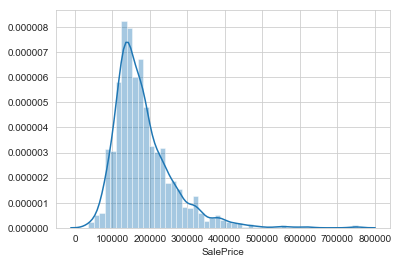

In [65]:
# Analyzing the Target Variable
sns.distplot(df_house_pred.SalePrice)
plt.show()

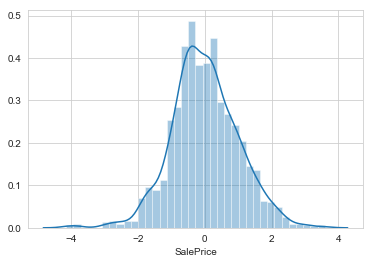

In [66]:
# This is not a  normally Distribution
# Hence we are taking power transform featurewise to make data more Gaussian-like
# As most of the transformation needs the data to be normally distributed

pt = PowerTransformer()
pt.fit(df_house_pred.SalePrice.values.reshape(-1,1))
df_house_pred.SalePrice = pt.transform(df_house_pred.SalePrice.values.reshape(-1,1)).reshape(-1)

# Analyzing the Target Variable
sns.distplot(df_house_pred.SalePrice)
plt.show()

# After this the Data Looks Normally Distributed

#### Outlier Analysis

In [67]:
# Getting the Numeric columns
numeric_col = df_house_pred.select_dtypes([np.number]).columns.tolist()
# Removing some columns
numeric_col.remove('Id') # As this is the ID
numeric_col.remove('SalePrice') # And this is the Target Variable
print(numeric_col)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YearBuilt_age', 'GarageYrBlt_age', 'YearRemodAdd_age', 'YrSold_age']


Number of Numerical Columns is 33


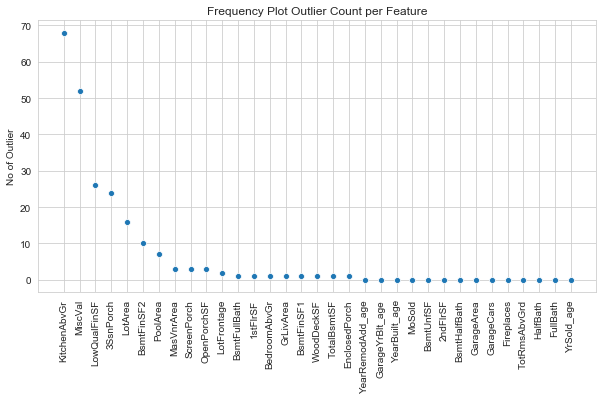

Number of Outliers Existing: 222


In [68]:
# Firstly we would fetch the numeric Data and then we will check each of the Numeric Column whether they are Outliers or not
# So here we will see the Q1 and Q3, if the data points are < Q1-(1.5 * IQR) and > Q3+(1.5 * IQR) then the data point is treated as Outlier
# We will get the points and then we would plot and check it out the Number of Outliers per data point

print("Number of Numerical Columns is {0}".format(len(numeric_col)))
df_house_pred_numerical_cols = df_house_pred[numeric_col]
Q1 = df_house_pred_numerical_cols.quantile(0.10)
Q3 = df_house_pred_numerical_cols.quantile(0.95)
IQR = Q3 - Q1
outlier_cnt_df = pd.DataFrame(((df_house_pred_numerical_cols < (Q1 - 1.5 * IQR)) | (df_house_pred_numerical_cols > ( Q3 + 1.5 * IQR))).sum(), columns= ['No of Outlier'])
outlier_cnt_df.sort_values(by = 'No of Outlier', ascending = False, inplace = True )
plt.figure(figsize=(10,5))
sns.scatterplot(x = outlier_cnt_df.index, y = outlier_cnt_df['No of Outlier'] )
plt.xticks(rotation = '90')
plt.title('Frequency Plot Outlier Count per Feature')
plt.show()

print("Number of Outliers Existing: {0}".format(outlier_cnt_df.sum().values[0]))

**Conclusion Driven**
1. As this can be seen there are some Features which has a lot number of Outliers, 50, So we would like to see few of them

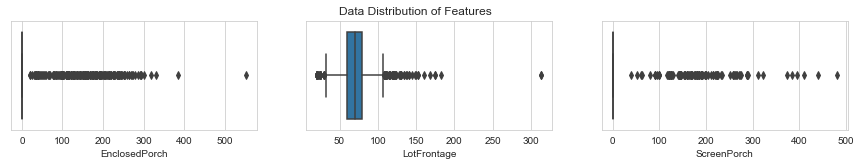

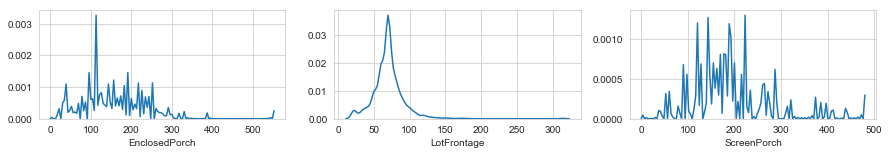

In [69]:
## We will try to visualize the distrubution for Some column
plt.figure(1, figsize=(15,2))
plt.suptitle('Data Distribution of Features')
plt.subplot(1,3,1)
sns.boxplot(df_house_pred['EnclosedPorch'])
plt.subplot(1,3,2)
sns.boxplot(df_house_pred['LotFrontage'])
plt.subplot(1,3,3)
sns.boxplot(df_house_pred['ScreenPorch'])
plt.show()

plt.figure(2, figsize=(15,2))
plt.subplot(1,3,1)
sns.distplot(df_house_pred['EnclosedPorch'], hist = False)
plt.subplot(1,3,2)
sns.distplot(df_house_pred['LotFrontage'], hist = False)
plt.subplot(1,3,3)
sns.distplot(df_house_pred['ScreenPorch'], hist = False)
plt.show()

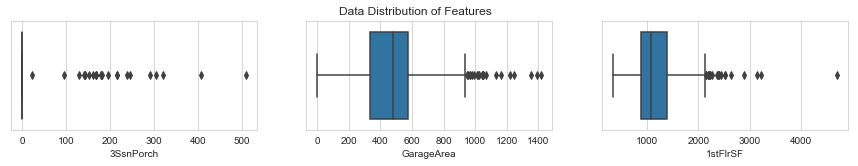

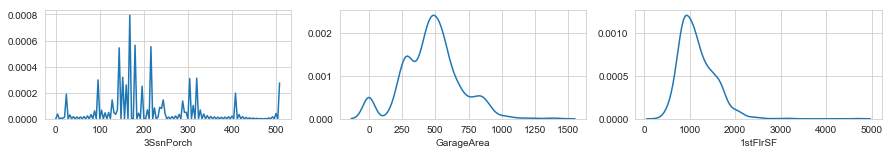

In [70]:
## We will try to visualize the distrubution for Some column,which has low outlier
plt.figure(1, figsize=(15,2))
plt.suptitle('Data Distribution of Features')
plt.subplot(1,3,1)
sns.boxplot(df_house_pred['3SsnPorch'])
plt.subplot(1,3,2)
sns.boxplot(df_house_pred['GarageArea'])
plt.subplot(1,3,3)
sns.boxplot(df_house_pred['1stFlrSF'])
plt.show()

plt.figure(2, figsize=(15,2))
plt.subplot(1,3,1)
sns.distplot(df_house_pred['3SsnPorch'], hist = False)
plt.subplot(1,3,2)
sns.distplot(df_house_pred['GarageArea'], hist = False)
plt.subplot(1,3,3)
sns.distplot(df_house_pred['1stFlrSF'], hist = False)
plt.show()

In [71]:
# As it's clearly seen there exists Outliers, as some of the data points are too far
# So we would drop them
# To get the list of all the Index, which needs to be dropped and they are being considered as Outliers
numdf = df_house_pred[numeric_col]
for col in numeric_col:
    Q1 = df_house_pred[col].quantile(.10)
    Q3 = df_house_pred[col].quantile(.95)
    IQR = Q3-Q1
    df_house_pred =  df_house_pred[(df_house_pred[col] >= (Q1-(1.5*IQR))) & (df_house_pred[col] <= (Q3+(1.5*IQR)))]
print("Shape of the Dataframe after removal of outlier is {0}".format(df_house_pred.shape))

Shape of the Dataframe after removal of outlier is (1262, 67)


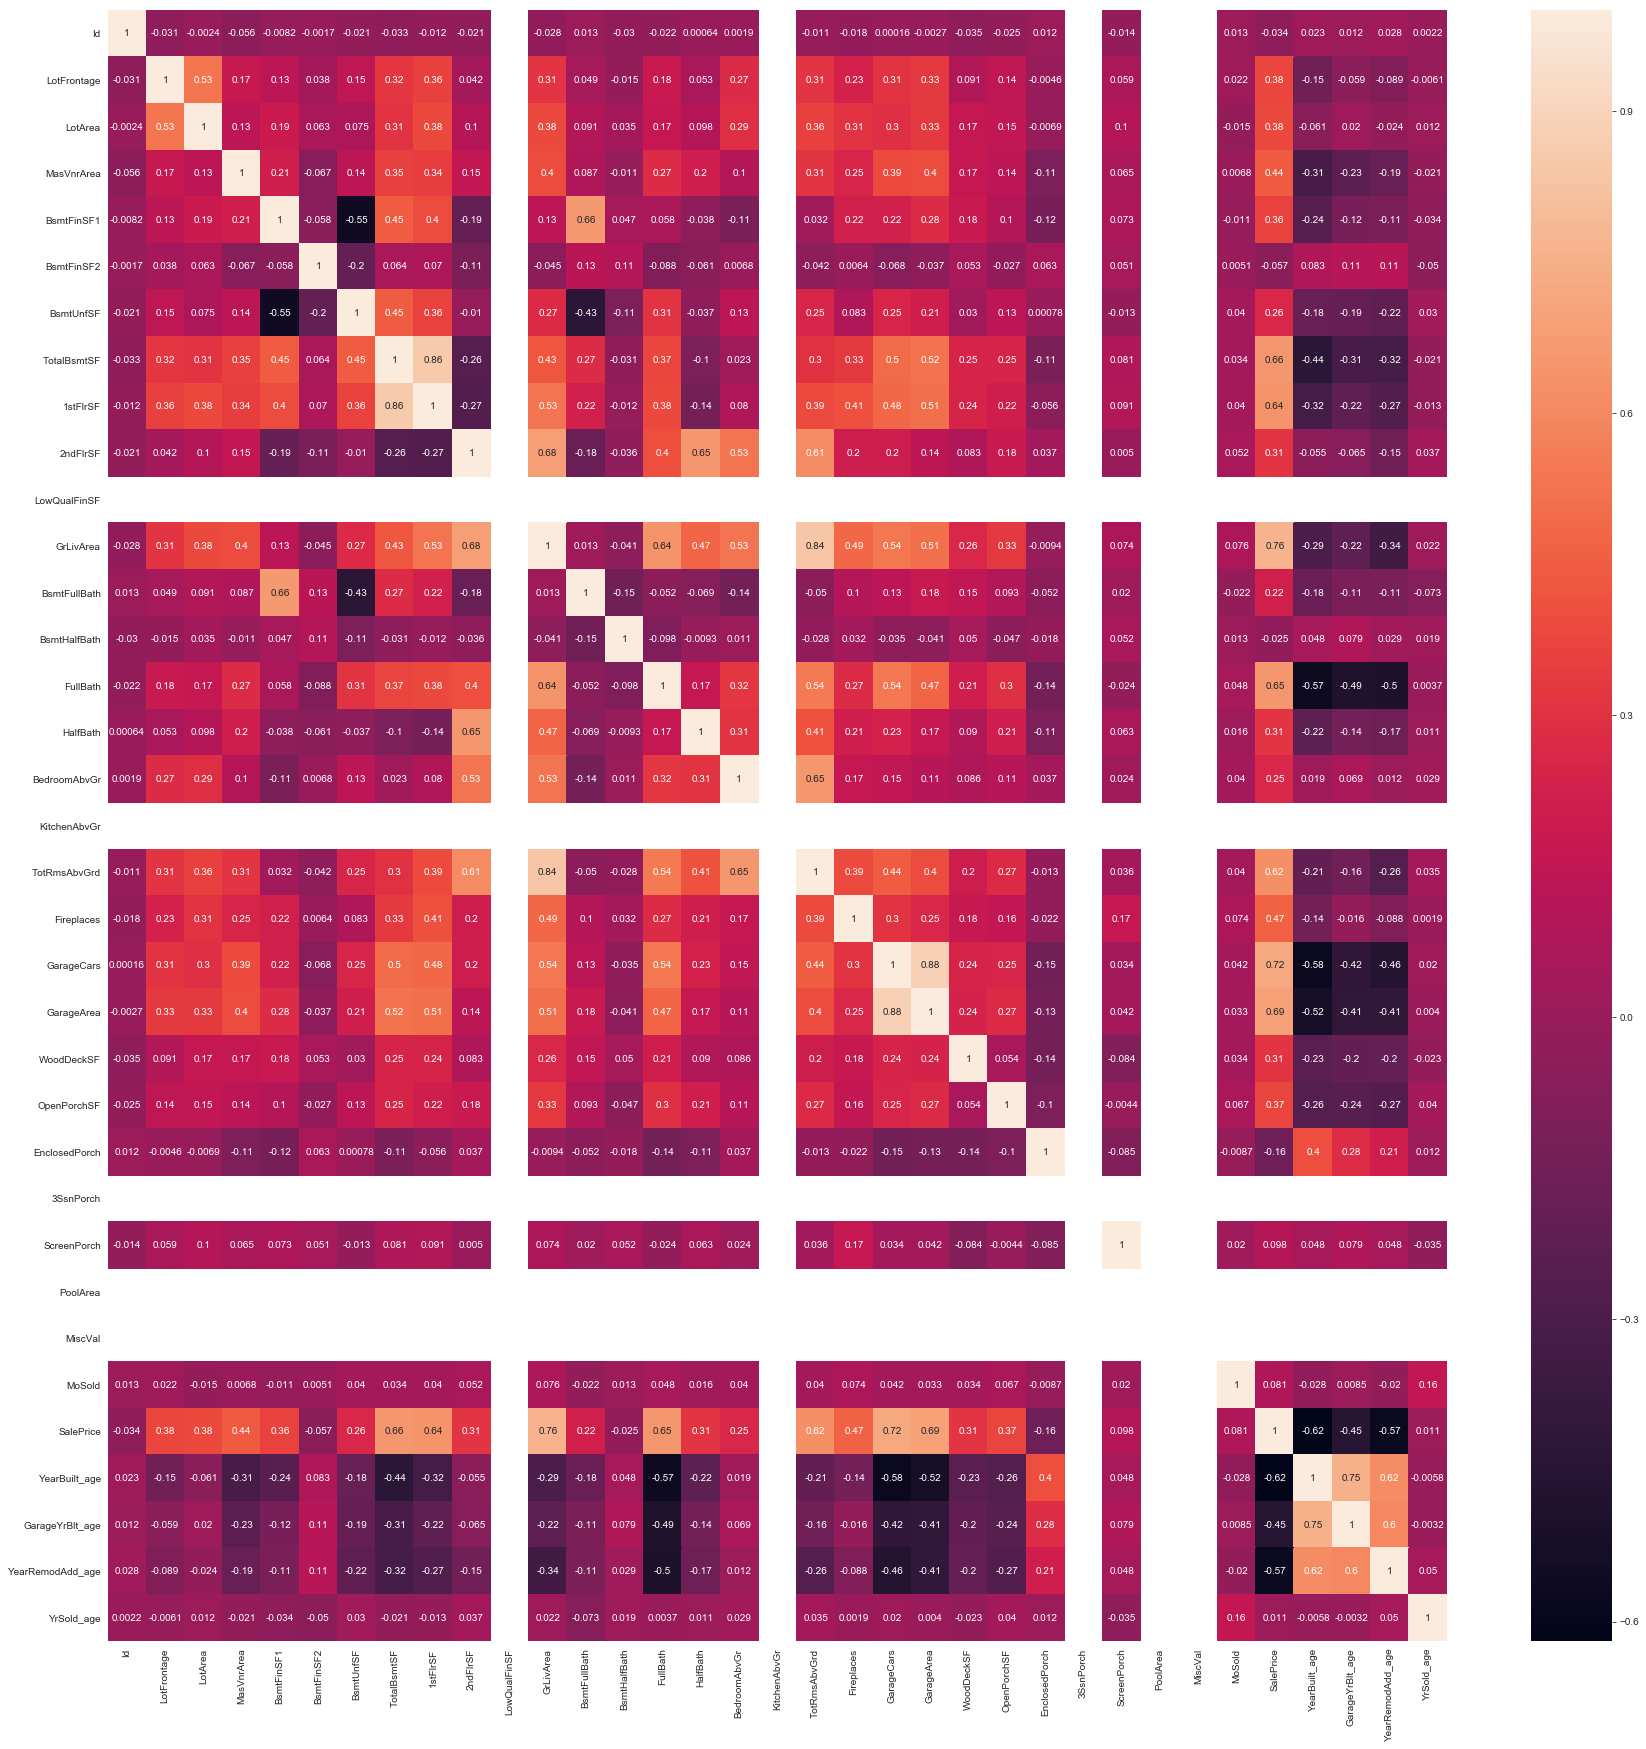

In [72]:
# Lets plot the Correlation Matrix to visualize if there is a relation among the variables exists or not
plt.figure(figsize=(30,30))
sns.heatmap(df_house_pred.corr(), annot=True)
plt.show()

In [73]:
# There are some Features where we can see in the Correlation Matrix, it's completly white
# So this values needs to be dropped as well
print('==========================================')
print(df_house_pred['LowQualFinSF'].value_counts())
print('==========================================')
print(df_house_pred['KitchenAbvGr'].value_counts())
print('==========================================')
print(df_house_pred['3SsnPorch'].value_counts())
print('==========================================')
print(df_house_pred['PoolArea'].value_counts())
print('==========================================')
print(df_house_pred['MiscVal'].value_counts())
print('==========================================')

0    1262
Name: LowQualFinSF, dtype: int64
1    1262
Name: KitchenAbvGr, dtype: int64
0    1262
Name: 3SsnPorch, dtype: int64
0    1262
Name: PoolArea, dtype: int64
0    1262
Name: MiscVal, dtype: int64


In [74]:
#Dropping all the Features
df_house_pred.drop(['LowQualFinSF', 'KitchenAbvGr','3SsnPorch','PoolArea','MiscVal'], inplace=True, axis=1)

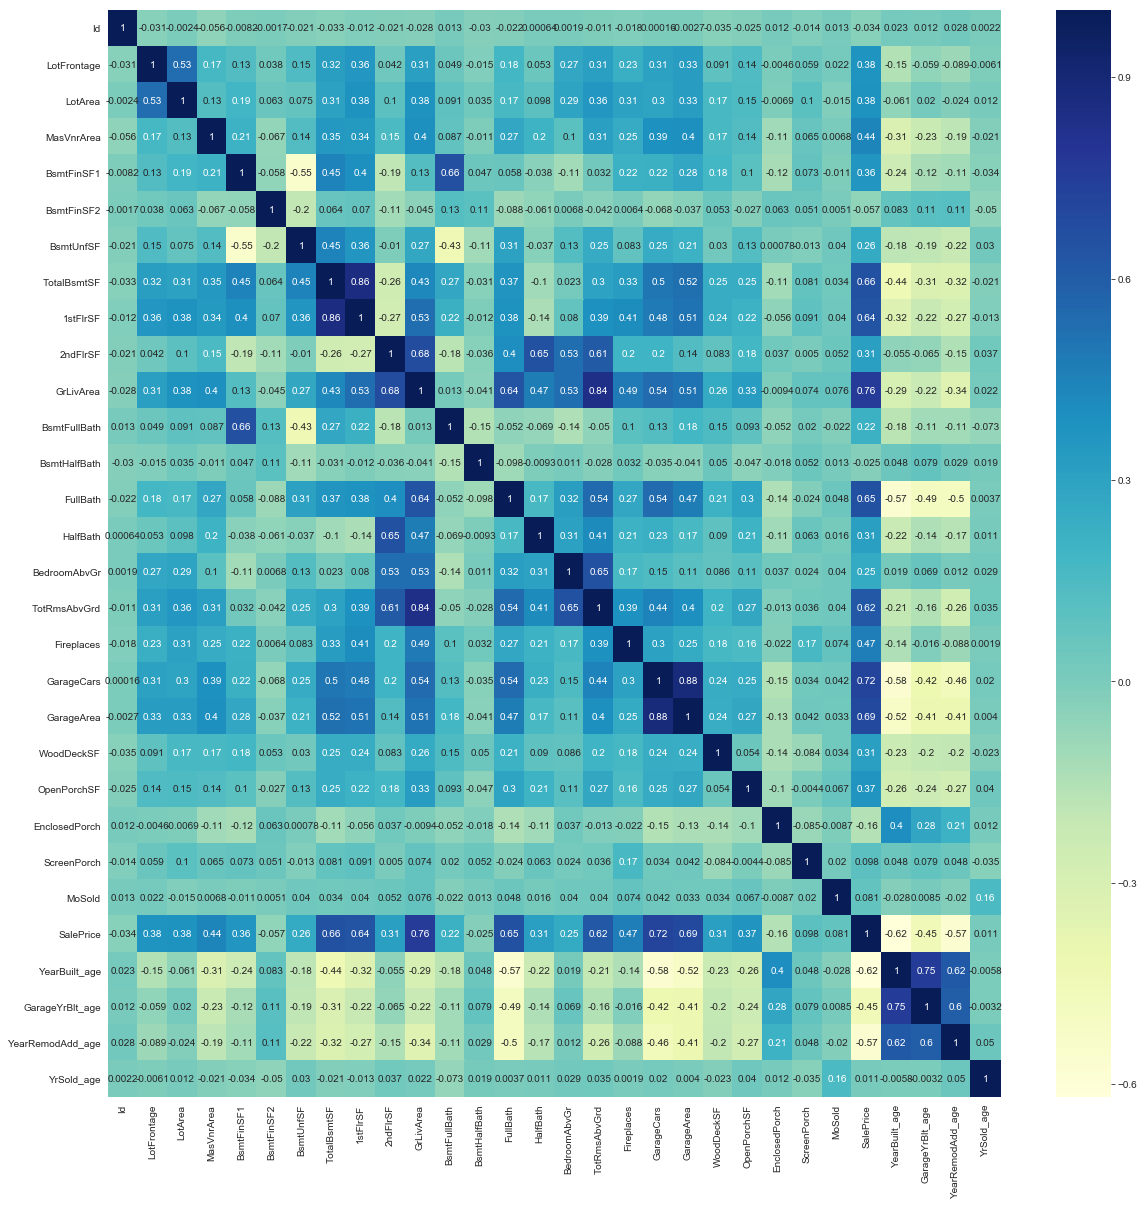

In [75]:
# Lets plot the Correlation Matrix to visualize if there is a relation among the variables exists or not
plt.figure(figsize=(20,20))
sns.heatmap(df_house_pred.corr(), annot=True, cmap="YlGnBu")
plt.show()

**Conclusion Driven**": As it can be seen for some of the features which are in the bottom and Rightmost, ther are negatively correllated and the Features in the middle, they are positively correlated

In [76]:
# Printing the shape of the data frame
print("Rows {0} Columns {1}".format(df_house_pred.shape[0], df_house_pred.shape[1]))

Rows 1262 Columns 62


### Dummies Creation

In [77]:
# Getting the categorical columns
categorical_col = df_house_pred.select_dtypes(['object','bool','category']).columns.tolist()
print(categorical_col)

['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']


In [78]:
# Creating Dummies
df_to_work_on = df_house_pred.copy()
df_to_work_on = pd.get_dummies(df_to_work_on, dummy_na= True, columns= categorical_col)
df_to_work_on.head()

Id  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0   1         65.0     8450       196.0         706           0        150   
1   2         80.0     9600         0.0         978           0        284   
2   3         68.0    11250       162.0         486           0        434   
3   4         60.0     9550         0.0         216           0        540   
4   5         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  SaleType_Oth  SaleType_WD  \
0          856       856       854  ...             0            1   
1         1262      1262         0  ...             0            1   
2          920       920       866  ...             0            1   
3          756       961       756  ...             0            1   
4         1145      1145      1053  ...             0            1   

   SaleType_nan  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0             0                      0                      0   
1             0                      0                      0   
2             0                      0                      0   
3             0                      1                      0   
4             0                      0                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  SaleCondition_nan  
0                      0                  0  
1                      0                  0  
2                      0                  0  
3                      0                  0  
4                      0                  0  

[5 rows x 282 columns]

In [79]:
#Removing all the NaN Columns from the list
final_catg_list = [ col for col in df_to_work_on.columns.tolist() if ( '_nan' in col )  ]
df_to_work_on.drop(final_catg_list, axis=1, inplace=True)

In [80]:
# Printing the shape of the data frame, after creating Dummies
print("After Dummy Encoding Rows {0} Columns {1}".format(df_to_work_on.shape[0], df_to_work_on.shape[1]))
print("Before Dummy Encoding Rows {0} Columns {1}".format(df_house_pred.shape[0], df_house_pred.shape[1]))

After Dummy Encoding Rows 1262 Columns 250
Before Dummy Encoding Rows 1262 Columns 62


In [81]:
df_to_work_on.drop(['Id'], axis = 1, inplace = True)

### Splitting in Training and Test Dataset

In [82]:
y= df_to_work_on.pop('SalePrice')
X = df_to_work_on

In [83]:
# Splitting in Training, Test Dataset
X_train, X_test, y_train, y_test = train_test_split( X,y, train_size = 0.7, random_state = 42)

### Feature Scalling

In [84]:
# getting the list of columns which are created by Dummies
cols_list = df_to_work_on.columns.tolist()
not_crated_by_dummies = [col for col in cols_list if not ( '_' in col)]

sc = StandardScaler()
X_train[not_crated_by_dummies] = sc.fit_transform(X_train[not_crated_by_dummies])
X_test[not_crated_by_dummies] = sc.transform(X_test[not_crated_by_dummies])

In [85]:
print("Shape of the Train Dataset {0} and {1}".format(X_train.shape[0], X_train.shape[1]))
print("Shape of the Test Dataset {0} and {1}".format(X_test.shape[0], X_test.shape[1]))

Shape of the Train Dataset 883 and 248
Shape of the Test Dataset 379 and 248


### Model Building
#### Model 1

In [86]:
# Lets first use all the Features and check the model Performance
X_train_sm = sm.add_constant(X_train)
lr_model_1 = sm.OLS(y_train, X_train_sm).fit()
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     67.94
Date:                Sun, 15 Dec 2019   Prob (F-statistic):               0.00
Time:                        23:14:19   Log-Likelihood:                 118.60
No. Observations:                 883   AIC:                             168.8
Df Residuals:                     680   BIC:                             1140.
Df Model:                         202                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1036      0.031     -3.368      0.001      -0.164      -0.043
LotFrontage               0.0159      0.014      1.178      0.239      -0.011       0.042
LotArea                   0.0455      0.016      2.831      0.005       0.014       0.077
MasVnrArea                0.0029      0.015      0.198      0.843      -0.026       0.032
BsmtFinSF1                0.0639      0.014      4.687      0.000       0.037       0.091
BsmtFinSF2                0.0076      0.010      0.764      0.445      -0.012       0.027
BsmtUnfSF                 0.0286      0.011      2.491      0.013       0.006       0.051
TotalBsmtSF               0.1027      0.017      5.900      0.000       0.069       0.137
1stFlrSF                  0.0763      0.022      3.454      0.001       0.033       0.120
2ndFlrSF                  0.1025      0.024      4.200      0.000       0.055       0.150
GrLivArea                 0.1497      0.018      8.251      0.000       0.114       0.185
BsmtFullBath              0.0262      0.014      1.882      0.060      -0.001       0.054
BsmtHalfBath              0.0135      0.010      1.313      0.190      -0.007       0.034
FullBath                  0.0527      0.019      2.817      0.005       0.016       0.089
HalfBath                  0.0317      0.016      2.007      0.045       0.001       0.063
BedroomAbvGr             -0.0124      0.015     -0.798      0.425      -0.043       0.018
TotRmsAbvGrd              0.0226      0.021      1.091      0.276      -0.018       0.063
Fireplaces                0.0104      0.012      0.849      0.396      -0.014       0.034
GarageCars                0.0921      0.023      3.974      0.000       0.047       0.138
GarageArea                0.0390      0.023      1.693      0.091      -0.006       0.084
WoodDeckSF                0.0234      0.010      2.323      0.020       0.004       0.043
OpenPorchSF               0.0333      0.011      3.113      0.002       0.012       0.054
EnclosedPorch             0.0276      0.011      2.433      0.015       0.005       0.050
ScreenPorch               0.0295      0.010      3.014      0.003       0.010       0.049
MoSold                    0.0127      0.010      1.337      0.182      -0.006       0.031
YearBuilt_age            -0.0036      0.001     -2.715      0.007      -0.006      -0.001
GarageYrBlt_age           0.0001      0.001      0.178      0.858      -0.001       0.002
YearRemodAdd_age         -0.0009      0.001     -1.074      0.283      -0.003       0.001
YrSold_age                0.0042      0.007      0.575      0.565      -0.010       0.019
MSSubClass_20.0          -0.0563      0.117     -0.481      0.630      -0.286       0.173
MSSubClass_30.0          -0.1995      0.131     -1.518      0.130      -0.458       0.059
MSSubClass_40.0        

**Conclusion Driven**:
1. There are a lot of Feature around 200+
2. R2 and Adjusted R2 has a descent value
3. BIC and AIC Value is quite, one possible reason can be there are lot of Features
4. There are many Features whose PValues are quite high and there are features for which the PValues are wuite low nearly zero
5. Some of the variables have nearly zero as coefficients

In [87]:
def _deter_vif(X):
    """
    This Function Determines the VIFs for the set of column which is present in the X Data Frame
    Then it will calculate the VIF Scores for each columns and then
    it will print all the VIFs for which VIF score is not INF
    """
    vif = pd.DataFrame()
    vif['columns'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    # There are certain colums for which VIF is coming as inf
    # as per https://pvanb.wordpress.com/2016/04/25/vif-stepwise-variable-selection/
    # This basically comes when the features nearly does a perfect fit (R2 = 1) which results in an 
    # undefined VIF (denoted by inf in the table with results).
    print(vif[vif['VIF'] != np.inf])

In [88]:
_deter_vif(X_train_sm)
# There are values for which there is a high VIF > 10,
# So this not a perfect model lot of work needs to be done 

                   columns    VIF
25           YearBuilt_age  22.31
18              GarageCars   8.15
19              GarageArea   8.05
16            TotRmsAbvGrd   6.55
13                FullBath   5.31
26         GarageYrBlt_age   4.86
27        YearRemodAdd_age   4.79
2                  LotArea   3.93
14                HalfBath   3.80
15            BedroomAbvGr   3.65
3               MasVnrArea   3.35
11            BsmtFullBath   2.95
1              LotFrontage   2.77
17              Fireplaces   2.26
22           EnclosedPorch   1.95
21             OpenPorchSF   1.74
12            BsmtHalfBath   1.59
20              WoodDeckSF   1.55
23             ScreenPorch   1.45
28              YrSold_age   1.41
24                  MoSold   1.37
0                    const   0.00
107      HouseStyle_2.5Fin    NaN
123        OverallCond_2.0    NaN
160      Exterior2nd_Other    NaN
208       Electrical_FuseP    NaN
209         Electrical_Mix    NaN
220         Functional_Sev    NaN
226     Garage

In [89]:
def _plot_error_term(lr_model, X_sm, y):
    """
    This is do analysis on the error terms
    1. Histogram of the residual, so as to check whether it is Normal Distributed or not and whether it is centered around zero
    2. To plot the Scatter plot and to check whether it is having a cone shaped or not
    3. It plots the QQ PLots to checks whether the residual is a Normal Distribution
    4. This also prints the R Squared value 
    5. To check the Mean Squared Error value
    6. It's checks the Hetroscedacity using het_goldfeldquandt approach, this checks whether the two features have same variance
        i. This gives Two Values F Statistics
        ii. P Values, if the P Values is > 0.05 then the variance is same 
    """
    # To check the distribution of the error term for the Train 
    plt.figure(figsize=(15, 5))
    y_pred = lr_model.predict(X_sm)
    error_data = y.values.reshape(-1) - y_pred.values
    sns.distplot(error_data,ax = plt.subplot(1,3,1), hist= False)
    plt.title('Error Distribution')
    # The error term doesn't looks like nearly normally distributed

    sns.scatterplot(x = y.values.reshape(-1), y = y_pred.values,ax = plt.subplot(1,3,2) )
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Value')
    
    sm.qqplot(error_data, ax = plt.subplot(1,3,3), line='s')
    plt.title('QQ Plot to check the Normality')
    plt.show()
    
    print("R2 Score {}".format(r2_score(y, y_pred)))
    print("Mean Squared Error is {}".format(mean_squared_error(y, y_pred)))
    
    print("====== To check the Hetroscedacity ======")
    print("F-statistic : {}".format(round(dg.het_goldfeldquandt(y = y_pred.values.reshape(-1,1), x = y.values.reshape(-1,1))[0],4)))
    print("P value : {}".format(round(dg.het_goldfeldquandt(y = y_pred.values.reshape(-1,1), x = y.values.reshape(-1,1))[1],4)))
    print("=========================================")

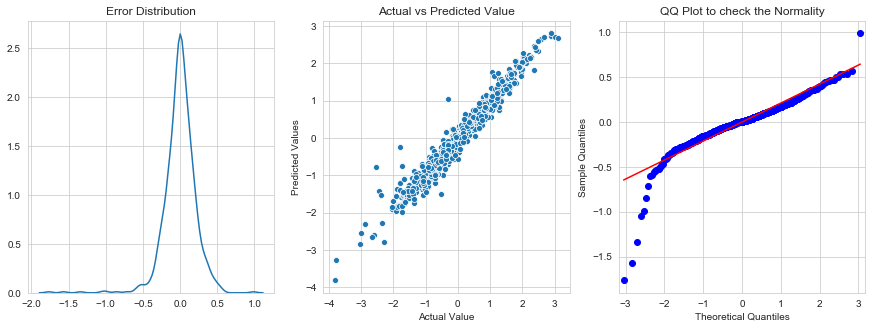

R2 Score 0.95279009820378
Mean Squared Error is 0.04475712747250946
====== To check the Hetroscedacity ======
F-statistic : 0.8085
P value : 0.987


In [90]:
# Performamce on Training Data 
_plot_error_term(lr_model_1, X_train_sm, y_train)

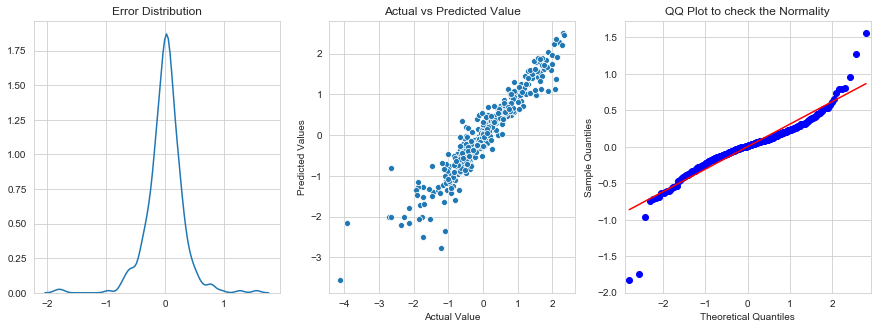

R2 Score 0.9055134627701853
Mean Squared Error is 0.09580106126459632
====== To check the Hetroscedacity ======
F-statistic : 0.861
P value : 0.8474


In [91]:
# Performamce on Testing Data 
_plot_error_term(lr_model_1, sm.add_constant(X_test), y_test)

**Conclusion Driven**:
1. Error is normally distributed
2. Error is having Hetroscedacity, as we can see Pvalue > 0.05 this is identified using the het_goldfeldquandt approach
3. Error is having a uniform Variance

#### Model 2

In [92]:
# Lets check how many number of Features are there
X_train.shape

(883, 248)

In [93]:
# As we can see there are lots of Data and if we apply The Lasso and Ridge with Grid Search this is will be Computationally
# not so efficient
# So via RFE let's reduce it to 100 features
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
rfe = RFE(linear_model, 100)
rfe = rfe.fit(X_train, y_train)

In [94]:
# To check the ranking of the columns and to also check which columns and selected
# This will show which columns are selected and what is their ranking
pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Columns', 'Is_Selected', 'Rank of Selection' ])

Columns  Is_Selected  Rank of Selection
0              LotFrontage        False                134
1                  LotArea        False                125
2               MasVnrArea        False                142
3               BsmtFinSF1        False                117
4               BsmtFinSF2        False                118
5                BsmtUnfSF        False                116
6              TotalBsmtSF        False                115
7                 1stFlrSF        False                114
8                 2ndFlrSF        False                113
9                GrLivArea        False                112
10            BsmtFullBath        False                133
11            BsmtHalfBath        False                137
12                FullBath        False                126
13                HalfBath        False                127
14            BedroomAbvGr        False                138
15            TotRmsAbvGrd        False                135
16              Fireplaces        False                139
17              GarageCars        False                124
18              GarageArea        False                128
19              WoodDeckSF        False                131
20             OpenPorchSF        False                129
21           EnclosedPorch        False                132
22             ScreenPorch        False                130
23                  MoSold        False                136
24           YearBuilt_age        False                140
25         GarageYrBlt_age        False                144
26        YearRemodAdd_age        False                143
27              YrSold_age        False                141
28         MSSubClass_20.0        False                105
29         MSSubClass_30.0        False                109
..                     ...          ...                ...
218         Functional_Mod         True                  1
219         Functional_Sev        False                147
220         Functional_Typ         True                  1
221      GarageType_2Types         True                  1
222      GarageType_Attchd         True                  1
223     GarageType_Basment         True                  1
224     GarageType_BuiltIn         True                  1
225     GarageType_CarPort        False                148
226      GarageType_Detchd         True                  1
227       GarageFinish_Fin         True                  1
228       GarageFinish_RFn         True                  1
229       GarageFinish_Unf         True                  1
230           PavedDrive_N        False                  7
231           PavedDrive_P        False                  8
232           PavedDrive_Y        False                  9
233           SaleType_COD         True                  1
234           SaleType_CWD         True                  1
235           SaleType_Con         True                  1
236         SaleType_ConLD         True                  1
237         SaleType_ConLI         True                  1
238         SaleType_ConLw         True                  1
239           SaleType_New         True                  1
240           SaleType_Oth         True                  1
241            SaleType_WD         True                  1
242  SaleCondition_Abnorml         True                  1
243  SaleCondition_AdjLand        False                149
244   SaleCondition_Alloca         True                  1
245   SaleCondition_Family         True                  1
246   SaleCondition_Normal         True                  1
247  SaleCondition_Partial         True                  1

[248 rows x 3 columns]

In [95]:
# To check the list of columns which columns are selected
X_train.columns[rfe.support_]

Index(['OverallQual_1.0', 'OverallQual_2.0', 'OverallQual_3.0',
       'OverallQual_4.0', 'OverallQual_5.0', 'OverallQual_6.0',
       'OverallQual_7.0', 'OverallQual_8.0', 'OverallQual_9.0',
       'OverallQual_10.0', 'OverallCond_1.0', 'OverallCond_2.0',
       'OverallCond_3.0', 'OverallCond_4.0', 'OverallCond_5.0',
       'OverallCond_6.0', 'OverallCond_7.0', 'OverallCond_8.0',
       'OverallCond_9.0', 'RoofStyle_Flat', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'Exterior1st_AsbShng', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing',
       'Exterior2nd_CBlock', 'MasVnrType_BrkCmn', 'MasVnrType_BrkFace',
       'MasVnrType_None', 'MasVnrType_Stone

In [96]:
# To get the Features which are selected via RFE 
X_train_rfe = X_train[X_train.columns[rfe.support_].tolist()]
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr_model_2 = sm.OLS(y_train, X_train_rfe_sm).fit()
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     39.12
Date:                Sun, 15 Dec 2019   Prob (F-statistic):          1.82e-227
Time:                        23:14:41   Log-Likelihood:                -517.97
No. Observations:                 883   AIC:                             1202.
Df Residuals:                     800   BIC:                             1599.
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0060      0.058      0.104      0.918      -0.108       0.120
OverallQual_1.0          -1.9823      0.538     -3.688      0.000      -3.038      -0.927
OverallQual_2.0           0.1682      0.729      0.231      0.818      -1.263       1.599
OverallQual_3.0          -0.7445      0.223     -3.335      0.001      -1.183      -0.306
OverallQual_4.0          -0.7164      0.137     -5.247      0.000      -0.984      -0.448
OverallQual_5.0          -0.3213      0.133     -2.423      0.016      -0.582      -0.061
OverallQual_6.0          -0.0366      0.130     -0.281      0.779      -0.293       0.219
OverallQual_7.0           0.3303      0.132      2.503      0.013       0.071       0.589
OverallQual_8.0           0.7806      0.136      5.721      0.000       0.513       1.048
OverallQual_9.0           1.1272      0.170      6.622      0.000       0.793       1.461
OverallQual_10.0          1.4009      0.241      5.825      0.000       0.929       1.873
OverallCond_1.0           0.6841      0.623      1.098      0.273      -0.539       1.907
OverallCond_2.0       -3.598e-15   3.75e-15     -0.959      0.338    -1.1e-14    3.77e-15
OverallCond_3.0          -0.4823      0.140     -3.452      0.001      -0.757      -0.208
OverallCond_4.0          -0.3019      0.131     -2.301      0.022      -0.560      -0.044
OverallCond_5.0          -0.1142      0.104     -1.094      0.274      -0.319       0.091
OverallCond_6.0          -0.0155      0.104     -0.149      0.881      -0.220       0.189
OverallCond_7.0           0.0616      0.106      0.583      0.560      -0.146       0.269
OverallCond_8.0           0.0342      0.114      0.299      0.765      -0.190       0.259
OverallCond_9.0           0.1402      0.173      0.811      0.418      -0.199       0.479
RoofStyle_Flat           -0.0838      0.267     -0.314      0.754      -0.607       0.440
RoofStyle_Gable          -0.1179      0.104     -1.132      0.258      -0.322       0.086
RoofStyle_Gambrel        -0.1698      0.177     -0.960      0.337      -0.517       0.177
RoofStyle_Hip            -0.0639      0.109     -0.588      0.556      -0.277       0.149
RoofStyle_Mansard         0.3355      0.213      1.574      0.116      -0.083       0.754
RoofStyle_Shed            0.1058      0.399      0.265      0.791      -0.677       0.889
Exterior1st_AsbShng      -0.0680      0.152     -0.448      0.654      -0.366       0.230
Exterior1st_BrkComm       0.1718      0.588      0.292      0.770      -0.982       1.326
Exterior1st_BrkFace       0.1534      0.111      1.380      0.168      -0.065       0.372
Exterior1st_CBlock        0.0217      0.281      0.077      0.938      -0.530       0.574
Exterior1st_CemntBd      -0.2502      0.099     -2.538      0.011      -0.444      -0.057
Exterior1st_HdBoard    

**Conclusion Driven**: There are about 100 Features and when we tried to apply the Linear Regression and we can see there are lots of Features for which the PValue is quite high So if we try the fit the model, the model will be Complex, let's try to make the model simpler so that there would be a Balance between Bias and Variance

#### Model 3

In [97]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

#### Ridge Regression with RFE

In [98]:
# Using the GridSearch CV finding the ideal value of alpha

ridge = Ridge()
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [99]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head().T

0                 1                2  \
mean_fit_time              0.00646172        0.00668254       0.00480142   
std_fit_time              0.000972017        0.00169459       0.00160031   
mean_score_time           0.000915813        0.00126257       0.00319967   
std_score_time            0.000944535        0.00163606       0.00159984   
param_alpha                    0.0001             0.001             0.01   
params              {'alpha': 0.0001}  {'alpha': 0.001}  {'alpha': 0.01}   
split0_test_score           -0.386909         -0.386871        -0.386497   
split1_test_score           -0.346691         -0.346667        -0.346441   
split2_test_score           -0.385801         -0.385789        -0.385673   
split3_test_score           -0.367943         -0.367929        -0.367791   
split4_test_score           -0.366503         -0.366488        -0.366332   
mean_test_score             -0.370777         -0.370757        -0.370554   
std_test_score              0.0147968         0.0147953        0.0147783   
rank_test_score                    23                22               21   
split0_train_score          -0.320675         -0.320684        -0.320773   
split1_train_score          -0.328186         -0.328196        -0.328294   
split2_train_score          -0.322015         -0.322019         -0.32206   
split3_train_score          -0.322963         -0.322972         -0.32306   
split4_train_score          -0.322845         -0.322855        -0.322954   
mean_train_score            -0.323337         -0.323345        -0.323428   
std_train_score            0.00255854        0.00255932        0.0025672   

                                  3               4  
mean_fit_time            0.00669141      0.00640545  
std_fit_time             0.00169006      0.00196578  
mean_score_time           0.0022285      0.00288935  
std_score_time           0.00184636      0.00156584  
param_alpha                    0.05             0.1  
params              {'alpha': 0.05}  {'alpha': 0.1}  
split0_test_score         -0.385071       -0.383627  
split1_test_score         -0.345465       -0.344409  
split2_test_score         -0.385213       -0.384751  
split3_test_score         -0.367289       -0.366826  
split4_test_score         -0.365691       -0.365004  
mean_test_score           -0.369753        -0.36893  
std_test_score            0.0147542       0.0147634  
rank_test_score                  20              19  
split0_train_score        -0.321132       -0.321529  
split1_train_score        -0.328693       -0.329134  
split2_train_score        -0.322231       -0.322439  
split3_train_score        -0.323412       -0.323801  
split4_train_score        -0.323334       -0.323705  
mean_train_score           -0.32376       -0.324121  
std_train_score          0.00260333      0.00264398

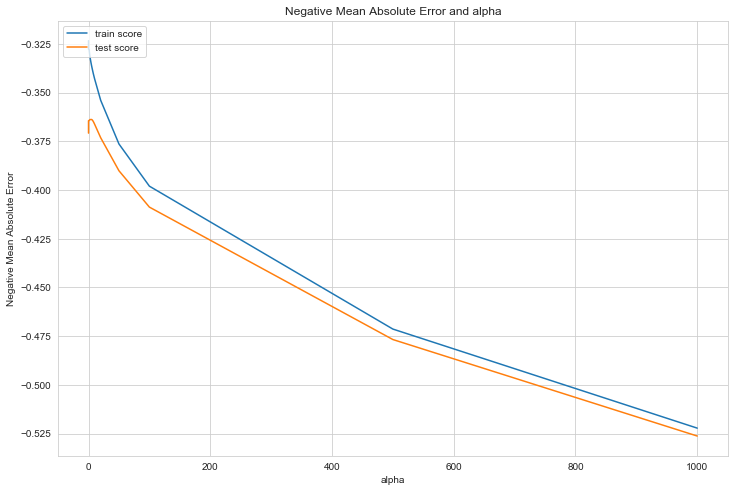

In [100]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

plt.figure(figsize=(12,8))
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [101]:
# To check the best values of the alpha 
model_cv.best_params_
# as we can also see from the above graph that Initially for the test error it start increasing and then it start decreasing,
# That's the point we are targetting for

{'alpha': 4.0}

In [102]:
# Considering the alpha as 0.3 and creating the model
alpha = 4.0
ridge_rfe = Ridge(alpha = alpha)
ridge_rfe.fit(X_train_rfe, y_train)

Ridge(alpha=4.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [103]:
# To get only the features which were selected via RFE
X_test_rfe = X_test[X_train_rfe.columns.tolist()]
X_test_rfe.head()

OverallQual_1.0  OverallQual_2.0  OverallQual_3.0  OverallQual_4.0  \
1395                0                0                0                0   
1017                0                0                0                0   
615                 0                0                0                0   
403                 0                0                0                0   
472                 0                0                0                0   

      OverallQual_5.0  OverallQual_6.0  OverallQual_7.0  OverallQual_8.0  \
1395                0                0                0                1   
1017                0                0                0                1   
615                 0                1                0                0   
403                 0                0                0                1   
472                 0                1                0                0   

      OverallQual_9.0  OverallQual_10.0  ...  SaleType_ConLI  SaleType_ConLw  \
1395                0                 0  ...               0               0   
1017                0                 0  ...               0               0   
615                 0                 0  ...               0               0   
403                 0                 0  ...               0               0   
472                 0                 0  ...               0               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
1395             0             0            1                      0   
1017             0             0            0                      1   
615              0             0            1                      1   
403              0             0            1                      1   
472              0             0            1                      0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
1395                     0                     0                     1   
1017                     0                     0                     0   
615                      0                     0                     0   
403                      0                     0                     0   
472                      0                     0                     1   

      SaleCondition_Partial  
1395                      0  
1017                      0  
615                       0  
403                       0  
472                       0  

[5 rows x 100 columns]

In [104]:
# Incase of Ridge what is the R2 Score
outcome_df = pd.DataFrame(index=['Alpha','Train_R2_Score','Train_MSE','Test_R2_Score', 'Test_MSE'])
outcome_df['Ridge_RFE'] = [alpha,round(r2_score(ridge_rfe.predict(X_train_rfe), y_train),2), round(mean_squared_error(ridge_rfe.predict(X_train_rfe), y_train),2), round(r2_score(ridge_rfe.predict(X_test_rfe), y_test),2), round(mean_squared_error(ridge_rfe.predict(X_test_rfe), y_test),2)] 
outcome_df

Ridge_RFE
Alpha                4.00
Train_R2_Score       0.72
Train_MSE            0.20
Test_R2_Score        0.65
Test_MSE             0.26

In [105]:
# List Of Columns and their coefficient
model_coefficient = list(ridge_rfe.coef_.round(2))
model_coefficient.insert(0, round(ridge_rfe.intercept_,2))
col_name = X_train_rfe.columns.tolist()
col_name.insert(0, 'Intercept')
ridge_rfe_df = pd.DataFrame(list(zip(col_name, model_coefficient)), columns= ['Columns', 'Coefficient'])
ridge_rfe_df.sort_values(by = 'Coefficient', ascending = False, inplace = True)
# Top 10 Features
ridge_rfe_df.head(15)

Columns  Coefficient
9       OverallQual_9.0         0.67
10     OverallQual_10.0         0.60
8       OverallQual_8.0         0.60
69       KitchenQual_Ex         0.39
76      Functional_Min2         0.30
45         ExterQual_Ex         0.30
55          BsmtQual_Ex         0.27
79    GarageType_2Types         0.22
7       OverallQual_7.0         0.22
24    RoofStyle_Mansard         0.21
17      OverallCond_7.0         0.18
52         ExterCond_TA         0.17
54      Foundation_Wood         0.17
93         SaleType_New         0.17
28  Exterior1st_BrkFace         0.17

#### Lasso Regression with RFE

In [106]:
# Using the GridSearch CV finding the ideal value of alpha
lasso = Lasso()
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [107]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head().T

0                 1                2  \
mean_fit_time               0.0611853          0.011723       0.00595803   
std_fit_time                0.0123047        0.00150617       0.00203081   
mean_score_time            0.00321822        0.00295887       0.00205965   
std_score_time              0.0028048        0.00192224       0.00164303   
param_alpha                    0.0001             0.001             0.01   
params              {'alpha': 0.0001}  {'alpha': 0.001}  {'alpha': 0.01}   
split0_test_score           -0.382694         -0.372301        -0.412188   
split1_test_score           -0.345404         -0.338251        -0.362436   
split2_test_score           -0.380356         -0.382998        -0.388517   
split3_test_score           -0.366254         -0.361179        -0.383181   
split4_test_score           -0.364189         -0.364855        -0.386774   
mean_test_score             -0.367785         -0.363919        -0.386623   
std_test_score              0.0134045         0.0148589        0.0158541   
rank_test_score                     2                 1                3   
split0_train_score          -0.321962         -0.330693        -0.369945   
split1_train_score          -0.329223         -0.336498        -0.377465   
split2_train_score          -0.322866         -0.328479        -0.370602   
split3_train_score          -0.324098         -0.330611        -0.371143   
split4_train_score          -0.324408         -0.330665         -0.36988   
mean_train_score            -0.324511         -0.331389        -0.371807   
std_train_score            0.00251373        0.00268986       0.00286678   

                                  3               4  
mean_fit_time            0.00567212      0.00640011  
std_fit_time             0.00113649      0.00196021  
mean_score_time          0.00247712      0.00160193  
std_score_time           0.00130042      0.00196196  
param_alpha                    0.05             0.1  
params              {'alpha': 0.05}  {'alpha': 0.1}  
split0_test_score           -0.5171       -0.563974  
split1_test_score         -0.438446       -0.490527  
split2_test_score         -0.460107       -0.507511  
split3_test_score         -0.503768       -0.558954  
split4_test_score         -0.453235       -0.515378  
mean_test_score           -0.474522       -0.527246  
std_test_score            0.0304424        0.029107  
rank_test_score                   4               5  
split0_train_score         -0.45964       -0.513594  
split1_train_score        -0.474016       -0.533274  
split2_train_score        -0.470207       -0.528346  
split3_train_score        -0.465883       -0.518844  
split4_train_score        -0.470153       -0.525769  
mean_train_score           -0.46798       -0.523965  
std_train_score          0.00490047      0.00696959

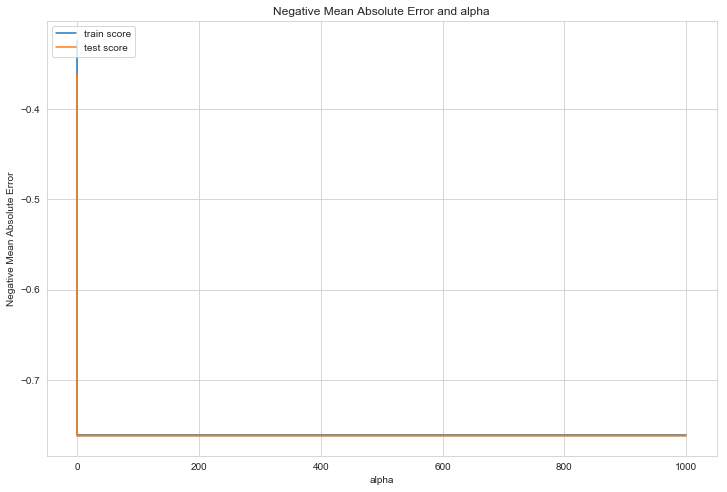

In [108]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

plt.figure(figsize=(12,8))
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [109]:
# To check the best values of the alpha 
model_cv.best_params_

{'alpha': 0.001}

In [110]:
# Considering the alpha as 0.001 and creating the model
alpha = 0.001
lasso_rfe = Lasso(alpha = alpha)
lasso_rfe.fit(X_train_rfe, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [111]:
# List Of Columns and their coefficient
model_coefficient = list(lasso_rfe.coef_.round(2))
model_coefficient.insert(0, round(lasso_rfe.intercept_,2))
col_name = X_train_rfe.columns.tolist()
col_name.insert(0, 'Intercept')
lasso_rfe_df = pd.DataFrame(list(zip(col_name, model_coefficient)), columns= ['Columns', 'Coefficient'])
lasso_rfe_df.sort_values(by = 'Coefficient', ascending = False, inplace = True)
# Top 10 Features
lasso_rfe_df.head(15)

Columns  Coefficient
10      OverallQual_10.0         1.25
9        OverallQual_9.0         1.07
8        OverallQual_8.0         0.80
69        KitchenQual_Ex         0.43
7        OverallQual_7.0         0.36
76       Functional_Min2         0.30
55           BsmtQual_Ex         0.28
93          SaleType_New         0.28
79     GarageType_2Types         0.26
24     RoofStyle_Mansard         0.24
71        KitchenQual_Gd         0.22
28   Exterior1st_BrkFace         0.15
99  SaleCondition_Normal         0.15
60       BsmtExposure_Gd         0.14
61       BsmtExposure_Mn         0.13

In [112]:
# Incase of Ridge what is the R2 Score
outcome_df['Lasso_RFE'] = [alpha,round(r2_score(lasso_rfe.predict(X_train_rfe), y_train),2),round(mean_squared_error(lasso_rfe.predict(X_train_rfe), y_train),2), round(r2_score(lasso_rfe.predict(X_test_rfe), y_test),2), round(mean_squared_error(lasso_rfe.predict(X_test_rfe), y_test),2)] 
outcome_df

Ridge_RFE  Lasso_RFE
Alpha                4.00      0.001
Train_R2_Score       0.72      0.730
Train_MSE            0.20      0.200
Test_R2_Score        0.65      0.670
Test_MSE             0.26      0.250

**Conslusion Driven**: So from the above Table we can conclude for the for both Ridge and Lasso, R2 Squared values are nearly same when we have Consumed RFE with number of Features as 100

### Lets Try to build model with all Features
#### Ridge Regression

In [113]:
# Using the GridSearch CV finding the ideal value of alpha

ridge = Ridge()
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [114]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head().T

0                 1                2  \
mean_fit_time               0.0102704         0.0147315       0.00922594   
std_fit_time               0.00207724       0.000911928       0.00162779   
mean_score_time             0.0033052         0.0012125        0.0023984   
std_score_time             0.00103748        0.00112865       0.00195828   
param_alpha                    0.0001             0.001             0.01   
params              {'alpha': 0.0001}  {'alpha': 0.001}  {'alpha': 0.01}   
split0_test_score           -0.241581          -0.24145        -0.240231   
split1_test_score           -0.215748         -0.215663        -0.214876   
split2_test_score            -0.20966         -0.209655        -0.209605   
split3_test_score           -0.201345         -0.201315        -0.201058   
split4_test_score            -0.21149          -0.21145        -0.211057   
mean_test_score             -0.215986         -0.215928        -0.215387   
std_test_score              0.0136424         0.0136025        0.0132339   
rank_test_score                    25                24               23   
split0_train_score          -0.134989         -0.134999        -0.135098   
split1_train_score          -0.140847         -0.140859        -0.140984   
split2_train_score          -0.140368         -0.140371        -0.140405   
split3_train_score          -0.139267         -0.139281        -0.139423   
split4_train_score          -0.141634         -0.141643        -0.141742   
mean_train_score            -0.139421         -0.139431         -0.13953   
std_train_score            0.00234507        0.00234437       0.00234227   

                                  3               4  
mean_fit_time             0.0115321       0.0103539  
std_fit_time            0.000979067       0.0020357  
mean_score_time          0.00285139      0.00239773  
std_score_time           0.00235936      0.00195774  
param_alpha                    0.05             0.1  
params              {'alpha': 0.05}  {'alpha': 0.1}  
split0_test_score         -0.236094       -0.232541  
split1_test_score         -0.212219       -0.209919  
split2_test_score         -0.209393       -0.209145  
split3_test_score         -0.200362       -0.199633  
split4_test_score          -0.20942       -0.208269  
mean_test_score           -0.213517       -0.211919  
std_test_score            0.0119903       0.0109696  
rank_test_score                  22              21  
split0_train_score        -0.135552       -0.136086  
split1_train_score        -0.141452       -0.141939  
split2_train_score        -0.140553       -0.140744  
split3_train_score        -0.139973       -0.140508  
split4_train_score        -0.142176        -0.14266  
mean_train_score          -0.139941       -0.140387  
std_train_score          0.00232052      0.00228961

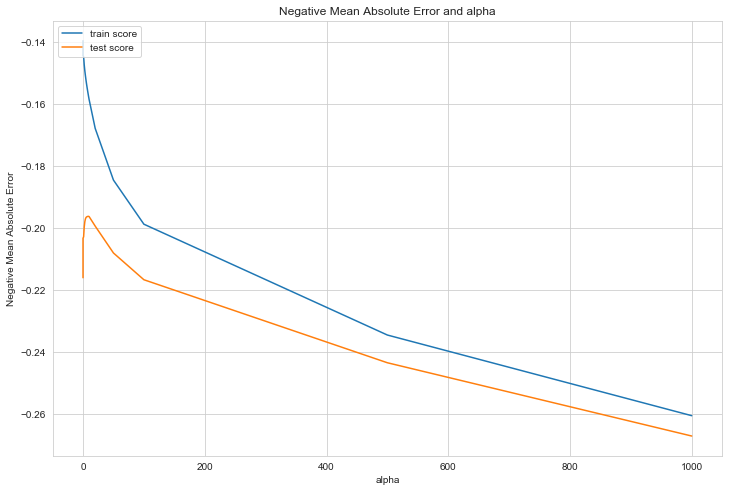

In [115]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

plt.figure(figsize=(12,8))
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [116]:
# To check the best values of the alpha 
model_cv.best_params_
# as we can also see from the above graph that Initially for the test error it start increasing and then it start decreasing,
# That's the point we are targetting for

{'alpha': 9.0}

In [117]:
# Considering the alpha as 9 and creating the model
alpha = 9.0
ridge_all = Ridge(alpha = alpha)
ridge_all.fit(X_train, y_train)

Ridge(alpha=9.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [118]:
# Incase of Ridge what is the R2 Score
outcome_df['Ridge_All'] = [alpha,round(r2_score(ridge_all.predict(X_train), y_train),2),round(mean_squared_error(ridge_all.predict(X_train), y_train),2), round(r2_score(ridge_all.predict(X_test), y_test),2), round(mean_squared_error(ridge_all.predict(X_test), y_test),2)] 
outcome_df

Ridge_RFE  Lasso_RFE  Ridge_All
Alpha                4.00      0.001       9.00
Train_R2_Score       0.72      0.730       0.94
Train_MSE            0.20      0.200       0.06
Test_R2_Score        0.65      0.670       0.91
Test_MSE             0.26      0.250       0.08

In [119]:
# List Of Columns and their coefficient
model_coefficient = list(ridge_all.coef_.round(2))
model_coefficient.insert(0, round(ridge_all.intercept_,2))
col_name = X_train.columns.tolist()
col_name.insert(0, 'Intercept')
ridge_all_df = pd.DataFrame(list(zip(col_name, model_coefficient)), columns= ['Columns', 'Coefficient'])
ridge_all_df.sort_values(by = 'Coefficient', ascending = False, inplace = True)
# Top 10 Features
ridge_all_df.head(15)

Columns  Coefficient
71   Neighborhood_Crawfor         0.23
120       OverallQual_9.0         0.20
87   Neighborhood_StoneBr         0.16
129       OverallCond_8.0         0.16
221        Functional_Typ         0.16
10              GrLivArea         0.16
211        KitchenQual_Ex         0.15
45            MSZoning_FV         0.15
130       OverallCond_9.0         0.14
128       OverallCond_7.0         0.14
35        MSSubClass_70.0         0.13
119       OverallQual_8.0         0.13
139   Exterior1st_BrkFace         0.11
247  SaleCondition_Normal         0.10
205          CentralAir_Y         0.10

#### Lasso Regression

In [120]:
# Using the GridSearch CV finding the ideal value of alpha
lasso = Lasso()
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [121]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head().T

0                 1                2  \
mean_fit_time                0.114646          0.078493        0.0223365   
std_fit_time                0.0421566         0.0116771       0.00640556   
mean_score_time            0.00141249        0.00333238      0.000514603   
std_score_time             0.00192219        0.00617751       0.00102921   
param_alpha                    0.0001             0.001             0.01   
params              {'alpha': 0.0001}  {'alpha': 0.001}  {'alpha': 0.01}   
split0_test_score           -0.225238         -0.212441        -0.269917   
split1_test_score           -0.201028         -0.186486        -0.221851   
split2_test_score           -0.204211         -0.193581        -0.217905   
split3_test_score           -0.195652         -0.188539        -0.216666   
split4_test_score           -0.203426         -0.185716        -0.225973   
mean_test_score             -0.205925         -0.193367        -0.230483   
std_test_score              0.0101214        0.00993671        0.0200119   
rank_test_score                     2                 1                3   
split0_train_score          -0.137292         -0.151325        -0.213179   
split1_train_score          -0.143563         -0.156281         -0.22293   
split2_train_score          -0.141801         -0.152074        -0.221083   
split3_train_score          -0.141451         -0.152701        -0.222398   
split4_train_score            -0.1437         -0.155411        -0.218254   
mean_train_score            -0.141562         -0.153558        -0.219569   
std_train_score             0.0023183        0.00193738       0.00358193   

                                  3               4  
mean_fit_time              0.015746       0.0160863  
std_fit_time             0.00470036      0.00103474  
mean_score_time         0.000219631      0.00276723  
std_score_time          0.000439262      0.00235143  
param_alpha                    0.05             0.1  
params              {'alpha': 0.05}  {'alpha': 0.1}  
split0_test_score         -0.308425       -0.335208  
split1_test_score         -0.260533       -0.279729  
split2_test_score         -0.249194       -0.267297  
split3_test_score         -0.250123       -0.279768  
split4_test_score         -0.253927       -0.279255  
mean_test_score           -0.264469       -0.288271  
std_test_score            0.0223687       0.0239797  
rank_test_score                   4               5  
split0_train_score        -0.249811        -0.27446  
split1_train_score        -0.262548       -0.285835  
split2_train_score        -0.263703       -0.287566  
split3_train_score        -0.263436       -0.286571  
split4_train_score        -0.265316        -0.29026  
mean_train_score          -0.260963       -0.284938  
std_train_score           0.0056473      0.00544965

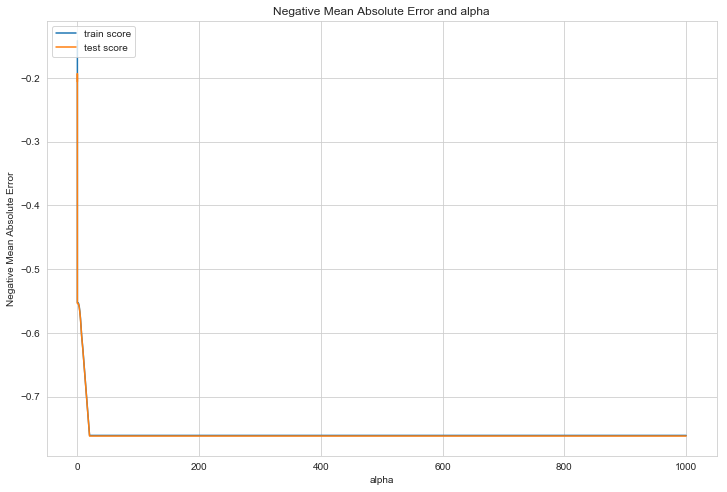

In [122]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

plt.figure(figsize=(12,8))
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [123]:
# To check the best values of the alpha 
model_cv.best_params_

{'alpha': 0.001}

In [124]:
# Considering the alpha as 0.001 and creating the model
alpha = 0.001
lasso_all = Lasso(alpha = alpha)
lasso_all.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [125]:
# List Of Columns and their coefficient
model_coefficient = list(lasso_all.coef_.round(2))
model_coefficient.insert(0, round(lasso_all.intercept_,2))
col_name = X_train.columns.tolist()
col_name.insert(0, 'Intercept')
lasso_all_df = pd.DataFrame(list(zip(col_name, model_coefficient)), columns= ['Columns', 'Coefficient'])
lasso_all_df.sort_values(by = 'Coefficient', ascending = False, inplace = True)
# Top 10 Features
lasso_all_df.head(15)

Columns  Coefficient
71   Neighborhood_Crawfor         0.31
10              GrLivArea         0.29
120       OverallQual_9.0         0.28
87   Neighborhood_StoneBr         0.20
211        KitchenQual_Ex         0.18
221        Functional_Typ         0.16
119       OverallQual_8.0         0.15
190       BsmtExposure_Gd         0.13
240          SaleType_New         0.13
247  SaleCondition_Normal         0.13
35        MSSubClass_70.0         0.12
130       OverallCond_9.0         0.12
7             TotalBsmtSF         0.11
45            MSZoning_FV         0.11
129       OverallCond_8.0         0.11

In [126]:
# Incase of Ridge what is the R2 Score
outcome_df['Lasso_All'] = [alpha,round(r2_score(lasso_all.predict(X_train), y_train),2), round(mean_squared_error(lasso_all.predict(X_train), y_train),2), round(r2_score(lasso_all.predict(X_test), y_test),2), round(mean_squared_error(lasso_all.predict(X_test), y_test),2)] 
outcome_df

Ridge_RFE  Lasso_RFE  Ridge_All  Lasso_All
Alpha                4.00      0.001       9.00      0.001
Train_R2_Score       0.72      0.730       0.94      0.940
Train_MSE            0.20      0.200       0.06      0.050
Test_R2_Score        0.65      0.670       0.91      0.910
Test_MSE             0.26      0.250       0.08      0.080

In [127]:
print("Lasso Top 10 Model Parameters")
print(lasso_all_df.head(10))
print("==========================")
print("==========================")
print("==========================")
print("Ridge Top 10 Model Parameters")
print(ridge_all_df.head(10))
print("==========================")
print("==========================")
print("==========================")
print("==========================")
print("==========================")
print("==========================")
print("Lasso Top 10 Model Parameters")
print(lasso_rfe_df.head(10))
print("==========================")
print("==========================")
print("==========================")
print("Ridge Top 10 Model Parameters")
print(ridge_rfe_df.head(10))

Lasso Top 10 Model Parameters
                  Columns  Coefficient
71   Neighborhood_Crawfor         0.31
10              GrLivArea         0.29
120       OverallQual_9.0         0.28
87   Neighborhood_StoneBr         0.20
211        KitchenQual_Ex         0.18
221        Functional_Typ         0.16
119       OverallQual_8.0         0.15
190       BsmtExposure_Gd         0.13
240          SaleType_New         0.13
247  SaleCondition_Normal         0.13
Ridge Top 10 Model Parameters
                  Columns  Coefficient
71   Neighborhood_Crawfor         0.23
120       OverallQual_9.0         0.20
87   Neighborhood_StoneBr         0.16
129       OverallCond_8.0         0.16
221        Functional_Typ         0.16
10              GrLivArea         0.16
211        KitchenQual_Ex         0.15
45            MSZoning_FV         0.15
130       OverallCond_9.0         0.14
128       OverallCond_7.0         0.14
Lasso Top 10 Model Parameters
              Columns  Coefficient
10   OverallQual_

**Conclusion Driven**: As we can see from above the model Build Result, 
1. Model with all the features has more R2 compared to the features Selection we did with RFE and then we applied the Ridge and Lasso.
2. Both the Train and Test R2 Score is identical for both Lasso and Ridge
3. As we are considering the Model will all the Features, and Lasso acts as a Feature Best Feature selection Technique 
4. Alpha Values for **Ridge** is **9.00** and **Lasso** is **0.001**

In [128]:
# Checking the Number of Features for which the Coefficient Turns out to be 0
count = 0
for elem in list(lasso_all.coef_):
    if elem == 0 :
        count += 1
print("Number of Features for which the Coefficient {0}".format(count))

count = 0
for elem in list(ridge_all.coef_):
    if elem == 0 :
        count += 1
print("Number of Features for which the Coefficient {0}".format(count))

# As we can see from below, the number of Features 

Number of Features for which the Coefficient 127
Number of Features for which the Coefficient 8


In [129]:
# List of Features and what's their Contribution
lasso_all_df.head(10)

Columns  Coefficient
71   Neighborhood_Crawfor         0.31
10              GrLivArea         0.29
120       OverallQual_9.0         0.28
87   Neighborhood_StoneBr         0.20
211        KitchenQual_Ex         0.18
221        Functional_Typ         0.16
119       OverallQual_8.0         0.15
190       BsmtExposure_Gd         0.13
240          SaleType_New         0.13
247  SaleCondition_Normal         0.13